### **Team members:**
* Aaina Batool (SP23-BAI-001)
* Amna Ahmad (SP23-BAI-004)
* Syed Taha (SP23-BAI-049)

**CONTENTS:**
* **Game Selection**
1.   Game
2.   Rules


* **Monte Carlo Tree Search (MCTS) Implementation**
1.   Algorithm
2.   Aims
3.   Description
4. Executing Monte Carlo Tree Search:

  a. Executing Monte Carlo Tree Search (AI vs Human)

  b. Executing Monte Carlo Tree Search (AI vs AI)

* **Alpha Beta Pruning**
1.   Algorithm
2. Executing Alpha Beta Pruning:

  a. Executing Alpha Beta Pruning (AI vs Human)

  b. Executing Alpha Beta Pruning (AI vs AI)


* **Comparative Analysis**
1. Analysis of the performance of MCTS and Alpha-Beta Pruning

  a. Efficinecy

  b. Accuracy

  c. Conclusion


  * **Results and Conclusion:**
  1. Results
  2. Insights

#   **CHOOSING GAME**

##    **Game Problem**

### Connect Four

Connect Four is a 2-player game. Players alternate taking turns. Each side of the Connect Four board has its own color of checkers. There is one color for each player.

In this project the popular board game of Connect Four has been designed and implemented. The game is designed based on the classic boxed version of the game which is played on a 7x6 board. The Artificial Intelligence (AI) behind the opponent's moves uses the Monte Carlo Tree Search algorithm (MCTS) which is one of the first heuristic search that doesn't require prior knowledge of the game to compute a heuristic function (like many other classic AI algorithms such as Minimax). The MCTS algorithm estimates winning probabilities of board states based on random simulations, the more time the algorithm can run, the more accurate the prediction are.

##   **Game Rules**

*    **Goal:**

The goal of Connect Four is to get 4 of your
color checkers in a row—horizontally,
vertically, or diagonally—before your
opponent does!

*     **Your Turn:**

When it is your turn, drop 1 of your checkers
into the open slot at the top of the Connect
Four board.

*    **Target:**

This allows you to either build
your row or stop your opponent from
getting 4 in a row.

*    **Opponent Turn:**

After you drop your
checker, it’s your opponent’s turn.

*   **Game End:**

The game is over when one player gets 4
checkers in a row, or when all slots are filled,
meaning the game ends in a stalemate.

# **MONTE CARLO SEARCH TREE (MCTS):**

## **Algorithm Explanation**

This **AI algorithm** is really a search algorithm that computes in advance possible states (board configurations) reachable by following the moves allowed by the game rules. While a simple brute force solution with no apriori knowledge (by using for example Breadth First Search) would look up in the worst case **4531985219092** board states, MCTS cut down this search by choosing to explore more promising nodes first based on its estimates of the **UCT value**.

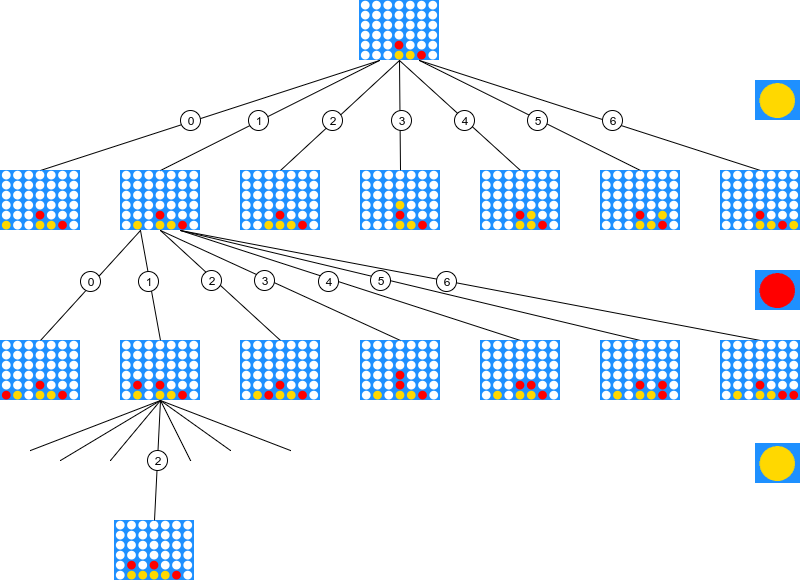

##   **Aim Of MCTS**

The aim for this project was to implement the MCTS algorithm on a fairly simple game to investigate the true potential of its capabilities in regards of how much time the program is allowed to "think" in advance for a move. The algorithm has been implemented following the classic four steps of:

* Selection;
* Expansion;
* Simulation;
* Backpropagation;

## **Description of MCTS Components**

As previously mentioned, this algorithm is composed of four total steps:

*  **Selection:** In the first step, starting from the initial board, the tree is searched one layer deeper and the path taken follows always the child with higher UCT computed value (further explanation of this index later). If some of the children of a node haven't been explored and so, no probability value is yet assigned to them, an unexplored child is selected with a policy (for example, the far most left one);

*  **Expansion:** After selecting a node, if all the other nodes in the same layer has been explored at least ones, generate its children node and select, for example, the far most left one. If the node happens to be a terminal one, select the node next to it for expansion;

*  **Simulation:** From the selected node run a simulated game in which every player move is played randomly until a terminal node is reached and a score is retrieved (Win: +1, Tie: 0, Lose: -1);

*  **Backpropagation:** Starting from the terminal node reached in the simulation, increment the number of visits of that node by 1 and sum or subtract (depending on that board's player turn respectively) the score obtained in the simulation. Then recursively backtrack to the parent of that node and repeat the process until the root node is reached;

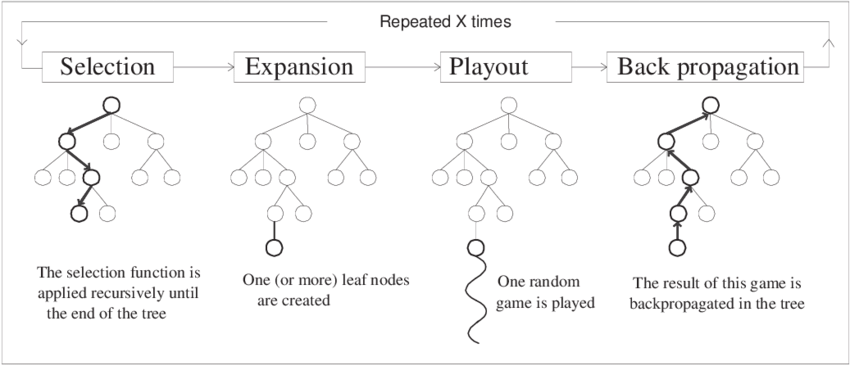

When the given time expires, the algorithm returns the move that leads to the child of the root node who has the largest number of visits, meaning that this move has been choosen most of the times during simulations as it allowed to reach winning states with more probability than the other nodes in the first layer.

## **Executing MCTS**

### AI vs Human:

In [ ]:
"""Connect4 Monte Carlo Tree Search module."""

from typing import Tuple, List, Optional
import random
import time
import os

import numpy as np

# MCTS move computation time
PROCESS_TIME: float = 3.0


class GameBoard:
    """Connect4 game board class."""

    def __init__(self, cpu: int) -> None:
        self.turn = random.randint(1, 2)
        self.board = np.zeros(shape=(6, 7))
        self.cpu = cpu

    def show(self) -> None:
        """Print out game board on console."""
        os.system("cls")
        print("+---------------------------+")
        for j in range(5, -1, -1):
            for i in range(7):
                if self.board[j, i] == 1:
                    print("| X", end=" ")
                elif self.board[j, i] == 2:
                    print("| O", end=" ")
                else:
                    print("|  ", end=" ")
            print("|")
        print("+---------------------------+")
        print("| 1   2   3   4   5   6   7 |")
        print("+---------------------------+")
        if self.turn == self.cpu:
            print("Opponent's turn [X]")
            print("Please wait...")
        else:
            print("Your turn [O]")
            print("Enter a number between 1 and 7: ", end="")

    def play(self) -> bool:
        """Take user input and play move.

        Returns:
            bool: Move registered correctly.
        """
        try:
            move = int(input())
            if move in [1, 2, 3, 4, 5, 6, 7]:
                for i in range(6):
                    if self.board[i, move - 1] == 0:
                        self.board[i, move - 1] = self.turn
                        self.switch_turn()
                        return True
            return False
        except ValueError:
            return False

    def check_win(self) -> Tuple[bool, Optional[int]]:
        """Check wheter the match is over.

        Returns:
            Tuple[bool, int | None]: Game has ended, winner id or None.
        """
        winner = GameBoard.check_rows(self.board)
        if winner is not None:
            return (True, winner)

        winner = GameBoard.check_cols(self.board)
        if winner is not None:
            return (True, winner)

        winner = GameBoard.check_diag(self.board)
        if winner is not None:
            return (True, winner)

        if GameBoard.check_tie(self.board):
            return (True, None)

        return (False, None)

    @staticmethod
    def check_rows(board: np.ndarray) -> Optional[int]:
        """Check for winner in rows.

        Args:
            board (np.ndarray): Board game.

        Returns:
            int | None: Winner id or None.
        """
        for y in range(6):
            row = list(board[y, :])
            for x in range(4):
                if row[x : x + 4].count(row[x]) == 4:
                    if row[x] != 0:
                        return row[x]
        return None

    @staticmethod
    def check_cols(board: np.ndarray) -> Optional[int]:
        """Check for winner in columns.

        Args:
            board (np.ndarray): Board game.

        Returns:
            int | None: Winner id or None.
        """
        for x in range(7):
            col = list(board[:, x])
            for y in range(3):
                if col[y : y + 4].count(col[y]) == 4:
                    if col[y] != 0:
                        return col[y]
        return None

    @staticmethod
    def check_diag(board: np.ndarray) -> Optional[int]:
        """Check for winner in diagonals.

        Args:
            board (np.ndarray): Board game.

        Returns:
            int | None: Winner id or None.
        """
        # Right diagonal
        for point in [
            (3, 0), (4, 0), (3, 1), (5, 0), (4, 1), (3, 2), (5, 1), (4, 2),
            (3, 3), (5, 2), (4, 3), (5, 3)
        ]:
            diag = []
            for k in range(4):
                diag.append(board[point[0] - k, point[1] + k])
            if diag.count(1) == 4 or diag.count(2) == 4:
                return diag[0]
        # Left diagonal
        for point in [
            (5, 3), (5, 4), (4, 3), (5, 5), (4, 4), (3, 3), (5, 6), (4, 5),
            (3, 4), (4, 6), (3, 5), (3, 6)
        ]:
            diag = []
            for k in range(4):
                diag.append(board[point[0] - k, point[1] - k])
            if diag.count(1) == 4 or diag.count(2) == 4:
                return diag[0]
        return None

    @staticmethod
    def check_tie(board: np.ndarray) -> bool:
        """Check if board is a tie.

        Args:
            board (np.ndarray): Board game.

        Returns:
            bool: Game is a tie.
        """
        return bool(np.all(board != 0))

    def apply_move(self, column: int) -> bool:
        """Apply move to board.

        Args:
            column (int): Selected column index.

        Returns:
            bool: Move applied successfully.
        """
        for i in range(6):
            if self.board[i, column - 1] == 0:
                self.board[i, column - 1] = self.turn
                self.switch_turn()
                return True
        return False

    def switch_turn(self) -> None:
        """Switch turn between players."""
        if self.turn == 1:
            self.turn = 2
        else:
            self.turn = 1


class MCTS:
    """Monte Carlo Tree search class."""

    def __init__(self, symbol: int, t: float) -> None:
        self.symbol = symbol
        self.t = t

    def compute_move(self, node: "Node") -> Tuple[int, int]:
        """Compute move using MCTS algorithm.

        Args:
            root (Node): Starting node.

        Returns:
            Tuple[int, int]: Board 2D coordinate.
        """
        time0 = time.time()
        while (time.time() - time0) < self.t:
            # selection and expansion
            leaf = self.select(node)
            if leaf is None:
                return (-1, -1)
            # simulation
            simulation_result = self.rollout(leaf)
            # backpropagation
            self.backpropagate(leaf, simulation_result)
        # from next best state get move coordinates
        selected = self.best_child(node)
        if selected is None:
            return (-1, -1)
        for j in range(6):
            for i in range(7):
                if selected.board[j][i] != node.board[j][i]:
                    return (j, i)
        return (-1, -1)

    def select(self, node: "Node") -> Optional["Node"]:
        """Node selection and expansion phase.

        Args:
            node (Node): Starting node.

        Returns:
            Node: Selected node.
        """
        # if all children of node have been expanded
        # select best one according to uct value
        while self.fully_expanded(node):
            tmp = self.select_uct(node)
            # break if select_uct returns the same node back
            if tmp == node:
                break
            node = tmp
        # if node is terminal, return it
        if node.terminal:
            return node
        # expand node and return it for rollout
        node.add_child()
        if node.children:
            return self.pick_unvisited(node.children)
        return node

    def select_uct(self, node: "Node") -> "Node":
        """Select node with best UCT value.

        Args:
            node (Node): Parent node.

        Returns:
            Node: Best child.
        """
        best_uct = -np.inf
        best_node = None
        for child in node.children:
            uct = (child.q / child.n) + 2 * np.sqrt(np.log(node.n) / child.n)
            if uct > best_uct:
                best_uct = uct
                best_node = child
        # Avoid error if node has no children
        if best_node is None:
            return node
        return best_node

    def fully_expanded(self, node: "Node") -> bool:
        """Check whether a node is fully expanded.

        Args:
            node (Node): Node to be checked.

        Returns:
            bool: Node is fully expanded.
        """
        visited = True
        # max number of children a node can have
        if list(node.board[5]).count(0) == len(node.children):
            # check if every node has been visited
            for child in node.children:
                if child.n == 0:
                    visited = False
            return visited
        return False

    def pick_unvisited(self, children: List["Node"]) -> Optional["Node"]:
        """Pick first unexplored child node.

        Args:
            children (List[Node]): List of children nodes.

        Returns:
            Node: Unexplored node or None.
        """
        for child in children:
            if child.n == 0:
                return child
        return None

    def rollout(self, node: "Node") -> Optional[int]:
        """Perform a random game simulation.

        Args:
            node (Node): Starting node.

        Returns:
            int | None: Game result.
        """
        board = node.board
        turn = node.turn
        if not node.terminal:
            while True:
                # switch turn
                turn = 1 if turn == 2 else 2
                # get moves from current board
                moves = self.get_moves(board, turn)
                if moves:
                    # select next board randomly
                    board = random.choice(moves)
                    # check if state is terminal
                    terminal = self.result(board)
                    if terminal != 0:
                        return terminal
                # with no moves left return result
                else:
                    return self.result(board)
        else:
            # if node is already terminal return result
            return self.result(board)

    def get_moves(self, board: np.ndarray, turn: int) -> List[np.ndarray]:
        """Get all possible next states.

        Args:
            board (np.ndarray): Game matrix.
            turn (int): Player id.

        Returns:
            List[np.ndarray]: List of new matrices.
        """
        moves = []
        for i in range(7):
            if board[5, i] == 0:
                for j in range(6):
                    if board[j, i] == 0:
                        tmp = board.copy()
                        if turn == 1:
                            tmp[j, i] = 2
                        else:
                            tmp[j, i] = 1
                        moves.append(tmp)
                        break
        return moves

    def result(self, board: np.ndarray) -> Optional[int]:
        """Get game result from terminal board.

        Args:
            board (np.ndarray): Game matrix.

        Returns:
            int | None: Winner id or None.
        """
        winner = GameBoard.check_rows(board)
        if winner is not None:
            return winner

        winner = GameBoard.check_cols(board)
        if winner is not None:
            return winner

        winner = GameBoard.check_diag(board)
        if winner is not None:
            return winner

        return None

    def backpropagate(self, node: "Node", winner: Optional[int]) -> None:
        """Update recursively node visits and scores from leaf to root.

        Args:
            node (Node): Leaf node.
            winner (int): Winner id.
        """
        # increment result by 1 if winner
        if node.turn == winner:
            node.q += 1
        # increment visit number by 1
        node.n += 1
        # stop if node is root
        if node.parent is None:
            return
        # call function recursively on parent
        self.backpropagate(node.parent, winner)

    def best_child(self, node: "Node") -> Optional["Node"]:
        """Get child node with largest number of visits.

        Args:
            node (Node): Parent node.

        Returns:
            Node | None: Best child node.
        """
        max_visit = 0
        best_node = None
        for child in node.children:
            if child.n > max_visit:
                max_visit = child.n
                best_node = child
        return best_node


class Node:
    """Monte Carlo tree node class."""

    def __init__(
        self, parent: Optional["Node"], board: np.ndarray, turn: int
    ) -> None:
        self.q = 0  # sum of rollout outcomes
        self.n = 0  # number of visits
        self.parent = parent
        self.board = board
        # root is always opponent's turn
        if turn == 1:
            self.turn = 2
        else:
            self.turn = 1
        # no children have been expanded yet
        self.children: List["Node"] = []
        self.terminal = self.check_terminal()
        self.expanded = False

    def check_terminal(self) -> bool:
        """Check whether node is a leaf.

        Returns:
            bool: Node is a leaf.
        """
        if GameBoard.check_rows(self.board):
            return True

        if GameBoard.check_cols(self.board):
            return True

        if GameBoard.check_diag(self.board):
            return True

        if GameBoard.check_tie(self.board):
            return True

        return False

    def add_child(self) -> None:
        """Add new child to node."""
        # node already expanded
        if self.expanded:
            return
        # get board of every child
        child_board = []
        for child in self.children:
            child_board.append(child.board)
        # find new child
        for i in range(7):
            if self.board[5, i] == 0:
                for j in range(6):
                    if self.board[j, i] == 0:
                        tmp = self.board.copy()
                        if self.turn == 1:
                            tmp[j, i] = 2
                            if child_board:
                                if not self.compare_children(tmp, child_board):
                                    self.children.append(Node(self, tmp, 1))
                                    return
                                break
                            self.children.append(Node(self, tmp, 1))
                            return
                        else:
                            tmp[j, i] = 1
                            if child_board:
                                if not self.compare_children(tmp, child_board):
                                    self.children.append(Node(self, tmp, 2))
                                    return
                                break
                            self.children.append(Node(self, tmp, 2))
                            return
        # no more children
        self.expanded = True
        return

    def compare_children(
        self, new_child: np.ndarray, children: List[np.ndarray]
    ) -> bool:
        """Check if node state is equal to one of children state.

        Args:
            new_child (Node): _description_
            children (List[Node]): _description_

        Returns:
            bool: _description_
        """
        for child in children:
            if (new_child == child).all():
                return True
        return False


if __name__ == "__main__":

    # Begin new game
    while True:
        game_board = GameBoard(cpu=1)
        monte_carlo = MCTS(symbol=1, t=5)

        # Game loop
        while True:
            game_board.show()

            # Check game over
            game_over, winner_id = game_board.check_win()
            if game_over is True:
                if winner_id is None:
                    print("\n\nTIE!!!")
                elif winner_id == game_board.cpu:
                    print("\n\nMONTE CARLO WON!!!")
                else:
                    print("\n\nYOU WON!!!")
                break

            # Monte Carlo turn
            if game_board.turn == monte_carlo.symbol:
                root = Node(
                    parent=None,
                    board=game_board.board,
                    turn=monte_carlo.symbol
                )
                mcts_move = monte_carlo.compute_move(root)
                game_board.board[mcts_move] = monte_carlo.symbol
                game_board.switch_turn()

            # Human turn
            else:
                game_board.play()

        # Rematch
        print("\nDo you want to play again? [Yes/No]", end=" ")
        ans = input()
        if ans not in ["Yes", "yes", "y"]:
            break


+---------------------------+
|   |   |   |   |   |   |   |
|   |   |   |   |   |   |   |
|   |   |   |   |   |   |   |
|   |   |   |   |   |   |   |
|   |   |   |   |   |   |   |
|   |   |   |   |   |   |   |
+---------------------------+
| 1   2   3   4   5   6   7 |
+---------------------------+
Your turn [O]
Enter a number between 1 and 7: 4
+---------------------------+
|   |   |   |   |   |   |   |
|   |   |   |   |   |   |   |
|   |   |   |   |   |   |   |
|   |   |   |   |   |   |   |
|   |   |   |   |   |   |   |
|   |   |   | O |   |   |   |
+---------------------------+
| 1   2   3   4   5   6   7 |
+---------------------------+
Opponent's turn [X]
Please wait...
+---------------------------+
|   |   |   |   |   |   |   |
|   |   |   |   |   |   |   |
|   |   |   |   |   |   |   |
|   |   |   |   |   |   |   |
|   |   |   |   |   |   |   |
| X |   |   | O |   |   |   |
+---------------------------+
| 1   2   3   4   5   6   7 |
+---------------------------+
Your turn [O]
Ent

### AI vs AI

In [ ]:
"""Connect4 Monte Carlo Tree Search module."""

from typing import Tuple, List, Optional
import random
import time
import os

import numpy as np

# MCTS move computation time
PROCESS_TIME: float = 3.0


class GameBoard:
    """Connect4 game board class."""

    def __init__(self, cpu: int) -> None:
        self.turn = random.randint(1, 2)
        self.board = np.zeros(shape=(6, 7))
        self.cpu = cpu

    def show(self) -> None:
        """Print out game board on console."""
        os.system("cls")
        print("+---------------------------+")
        for j in range(5, -1, -1):
            for i in range(7):
                if self.board[j, i] == 1:
                    print("| X", end=" ")
                elif self.board[j, i] == 2:
                    print("| O", end=" ")
                else:
                    print("|  ", end=" ")
            print("|")
        print("+---------------------------+")
        print("| 1   2   3   4   5   6   7 |")
        print("+---------------------------+")
        if self.turn == self.cpu:
            print("Opponent's turn [X]")
            print("Please wait...")
        else:
            print("Your turn [O]")
            print("Enter a number between 1 and 7: ", end="")

    def play(self) -> bool:
        """Take user input and play move.

        Returns:
            bool: Move registered correctly.
        """
        try:
            move = int(input())
            if move in [1, 2, 3, 4, 5, 6, 7]:
                for i in range(6):
                    if self.board[i, move - 1] == 0:
                        self.board[i, move - 1] = self.turn
                        self.switch_turn()
                        return True
            return False
        except ValueError:
            return False

    def check_win(self) -> Tuple[bool, Optional[int]]:
        """Check wheter the match is over.

        Returns:
            Tuple[bool, int | None]: Game has ended, winner id or None.
        """
        winner = GameBoard.check_rows(self.board)
        if winner is not None:
            return (True, winner)

        winner = GameBoard.check_cols(self.board)
        if winner is not None:
            return (True, winner)

        winner = GameBoard.check_diag(self.board)
        if winner is not None:
            return (True, winner)

        if GameBoard.check_tie(self.board):
            return (True, None)

        return (False, None)

    @staticmethod
    def check_rows(board: np.ndarray) -> Optional[int]:
        """Check for winner in rows.

        Args:
            board (np.ndarray): Board game.

        Returns:
            int | None: Winner id or None.
        """
        for y in range(6):
            row = list(board[y, :])
            for x in range(4):
                if row[x : x + 4].count(row[x]) == 4:
                    if row[x] != 0:
                        return row[x]
        return None

    @staticmethod
    def check_cols(board: np.ndarray) -> Optional[int]:
        """Check for winner in columns.

        Args:
            board (np.ndarray): Board game.

        Returns:
            int | None: Winner id or None.
        """
        for x in range(7):
            col = list(board[:, x])
            for y in range(3):
                if col[y : y + 4].count(col[y]) == 4:
                    if col[y] != 0:
                        return col[y]
        return None

    @staticmethod
    def check_diag(board: np.ndarray) -> Optional[int]:
        """Check for winner in diagonals.

        Args:
            board (np.ndarray): Board game.

        Returns:
            int | None: Winner id or None.
        """
        # Right diagonal
        for point in [
            (3, 0), (4, 0), (3, 1), (5, 0), (4, 1), (3, 2), (5, 1), (4, 2),
            (3, 3), (5, 2), (4, 3), (5, 3)
        ]:
            diag = []
            for k in range(4):
                diag.append(board[point[0] - k, point[1] + k])
            if diag.count(1) == 4 or diag.count(2) == 4:
                return diag[0]
        # Left diagonal
        for point in [
            (5, 3), (5, 4), (4, 3), (5, 5), (4, 4), (3, 3), (5, 6), (4, 5),
            (3, 4), (4, 6), (3, 5), (3, 6)
        ]:
            diag = []
            for k in range(4):
                diag.append(board[point[0] - k, point[1] - k])
            if diag.count(1) == 4 or diag.count(2) == 4:
                return diag[0]
        return None

    @staticmethod
    def check_tie(board: np.ndarray) -> bool:
        """Check if board is a tie.

        Args:
            board (np.ndarray): Board game.

        Returns:
            bool: Game is a tie.
        """
        return bool(np.all(board != 0))

    def apply_move(self, column: int) -> bool:
        """Apply move to board.

        Args:
            column (int): Selected column index.

        Returns:
            bool: Move applied successfully.
        """
        for i in range(6):
            if self.board[i, column - 1] == 0:
                self.board[i, column - 1] = self.turn
                self.switch_turn()
                return True
        return False

    def switch_turn(self) -> None:
        """Switch turn between players."""
        if self.turn == 1:
            self.turn = 2
        else:
            self.turn = 1


class MCTS:
    """Monte Carlo Tree search class."""

    def __init__(self, symbol: int, t: float) -> None:
        self.symbol = symbol
        self.t = t

    def compute_move(self, node: "Node") -> Tuple[int, int]:
        """Compute move using MCTS algorithm.

        Args:
            root (Node): Starting node.

        Returns:
            Tuple[int, int]: Board 2D coordinate.
        """
        time0 = time.time()
        while (time.time() - time0) < self.t:
            # selection and expansion
            leaf = self.select(node)
            if leaf is None:
                return (-1, -1)
            # simulation
            simulation_result = self.rollout(leaf)
            # backpropagation
            self.backpropagate(leaf, simulation_result)
        # from next best state get move coordinates
        selected = self.best_child(node)
        if selected is None:
            return (-1, -1)
        for j in range(6):
            for i in range(7):
                if selected.board[j][i] != node.board[j][i]:
                    return (j, i)
        return (-1, -1)

    def select(self, node: "Node") -> Optional["Node"]:
        """Node selection and expansion phase.

        Args:
            node (Node): Starting node.

        Returns:
            Node: Selected node.
        """
        # if all children of node have been expanded
        # select best one according to uct value
        while self.fully_expanded(node):
            tmp = self.select_uct(node)
            # break if select_uct returns the same node back
            if tmp == node:
                break
            node = tmp
        # if node is terminal, return it
        if node.terminal:
            return node
        # expand node and return it for rollout
        node.add_child()
        if node.children:
            return self.pick_unvisited(node.children)
        return node

    def select_uct(self, node: "Node") -> "Node":
        """Select node with best UCT value.

        Args:
            node (Node): Parent node.

        Returns:
            Node: Best child.
        """
        best_uct = -np.inf
        best_node = None
        for child in node.children:
            uct = (child.q / child.n) + 2 * np.sqrt(np.log(node.n) / child.n)
            if uct > best_uct:
                best_uct = uct
                best_node = child
        # Avoid error if node has no children
        if best_node is None:
            return node
        return best_node

    def fully_expanded(self, node: "Node") -> bool:
        """Check whether a node is fully expanded.

        Args:
            node (Node): Node to be checked.

        Returns:
            bool: Node is fully expanded.
        """
        visited = True
        # max number of children a node can have
        if list(node.board[5]).count(0) == len(node.children):
            # check if every node has been visited
            for child in node.children:
                if child.n == 0:
                    visited = False
            return visited
        return False

    def pick_unvisited(self, children: List["Node"]) -> Optional["Node"]:
        """Pick first unexplored child node.

        Args:
            children (List[Node]): List of children nodes.

        Returns:
            Node: Unexplored node or None.
        """
        for child in children:
            if child.n == 0:
                return child
        return None

    def rollout(self, node: "Node") -> Optional[int]:
        """Perform a random game simulation.

        Args:
            node (Node): Starting node.

        Returns:
            int | None: Game result.
        """
        board = node.board
        turn = node.turn
        if not node.terminal:
            while True:
                # switch turn
                turn = 1 if turn == 2 else 2
                # get moves from current board
                moves = self.get_moves(board, turn)
                if moves:
                    # select next board randomly
                    board = random.choice(moves)
                    # check if state is terminal
                    terminal = self.result(board)
                    if terminal != 0:
                        return terminal
                # with no moves left return result
                else:
                    return self.result(board)
        else:
            # if node is already terminal return result
            return self.result(board)

    def get_moves(self, board: np.ndarray, turn: int) -> List[np.ndarray]:
        """Get all possible next states.

        Args:
            board (np.ndarray): Game matrix.
            turn (int): Player id.

        Returns:
            List[np.ndarray]: List of new matrices.
        """
        moves = []
        for i in range(7):
            if board[5, i] == 0:
                for j in range(6):
                    if board[j, i] == 0:
                        tmp = board.copy()
                        if turn == 1:
                            tmp[j, i] = 2
                        else:
                            tmp[j, i] = 1
                        moves.append(tmp)
                        break
        return moves

    def result(self, board: np.ndarray) -> Optional[int]:
        """Get game result from terminal board.

        Args:
            board (np.ndarray): Game matrix.

        Returns:
            int | None: Winner id or None.
        """
        winner = GameBoard.check_rows(board)
        if winner is not None:
            return winner

        winner = GameBoard.check_cols(board)
        if winner is not None:
            return winner

        winner = GameBoard.check_diag(board)
        if winner is not None:
            return winner

        return None

    def backpropagate(self, node: "Node", winner: Optional[int]) -> None:
        """Update recursively node visits and scores from leaf to root.

        Args:
            node (Node): Leaf node.
            winner (int): Winner id.
        """
        # increment result by 1 if winner
        if node.turn == winner:
            node.q += 1
        # increment visit number by 1
        node.n += 1
        # stop if node is root
        if node.parent is None:
            return
        # call function recursively on parent
        self.backpropagate(node.parent, winner)

    def best_child(self, node: "Node") -> Optional["Node"]:
        """Get child node with largest number of visits.

        Args:
            node (Node): Parent node.

        Returns:
            Node | None: Best child node.
        """
        max_visit = 0
        best_node = None
        for child in node.children:
            if child.n > max_visit:
                max_visit = child.n
                best_node = child
        return best_node


class Node:
    """Monte Carlo tree node class."""

    def __init__(
        self, parent: Optional["Node"], board: np.ndarray, turn: int
    ) -> None:
        self.q = 0  # sum of rollout outcomes
        self.n = 0  # number of visits
        self.parent = parent
        self.board = board
        # root is always opponent's turn
        if turn == 1:
            self.turn = 2
        else:
            self.turn = 1
        # no children have been expanded yet
        self.children: List["Node"] = []
        self.terminal = self.check_terminal()
        self.expanded = False

    def check_terminal(self) -> bool:
        """Check whether node is a leaf.

        Returns:
            bool: Node is a leaf.
        """
        if GameBoard.check_rows(self.board):
            return True

        if GameBoard.check_cols(self.board):
            return True

        if GameBoard.check_diag(self.board):
            return True

        if GameBoard.check_tie(self.board):
            return True

        return False

    def add_child(self) -> None:
        """Add new child to node."""
        # node already expanded
        if self.expanded:
            return
        # get board of every child
        child_board = []
        for child in self.children:
            child_board.append(child.board)
        # find new child
        for i in range(7):
            if self.board[5, i] == 0:
                for j in range(6):
                    if self.board[j, i] == 0:
                        tmp = self.board.copy()
                        if self.turn == 1:
                            tmp[j, i] = 2
                            if child_board:
                                if not self.compare_children(tmp, child_board):
                                    self.children.append(Node(self, tmp, 1))
                                    return
                                break
                            self.children.append(Node(self, tmp, 1))
                            return
                        else:
                            tmp[j, i] = 1
                            if child_board:
                                if not self.compare_children(tmp, child_board):
                                    self.children.append(Node(self, tmp, 2))
                                    return
                                break
                            self.children.append(Node(self, tmp, 2))
                            return
        # no more children
        self.expanded = True
        return

    def compare_children(
        self, new_child: np.ndarray, children: List[np.ndarray]
    ) -> bool:
        """Check if node state is equal to one of children state.

        Args:
            new_child (Node): _description_
            children (List[Node]): _description_

        Returns:
            bool: _description_
        """
        for child in children:
            if (new_child == child).all():
                return True
        return False


if __name__ == "__main__":

    # Begin new game
    # Begin new game
  while True:
      game_board = GameBoard(cpu=1)
      monte_carlo_1 = MCTS(symbol=1, t=5)
      monte_carlo_2 = MCTS(symbol=2, t=5)

      # Game loop
      while True:
          game_board.show()

          # Check game over
          game_over, winner_id = game_board.check_win()
          if game_over is True:
              if winner_id is None:
                  print("\n\nTIE!!!")
              elif winner_id == 1:
                  print("\n\nMONTE CARLO 1 WON!!!")
              else:
                  print("\n\nMONTE CARLO 2 WON!!!")
              break

          # Monte Carlo 1 turn
          if game_board.turn == monte_carlo_1.symbol:
              root = Node(
                  parent=None,
                  board=game_board.board,
                  turn=monte_carlo_1.symbol
              )
              mcts_move = monte_carlo_1.compute_move(root)
              game_board.board[mcts_move] = monte_carlo_1.symbol
              game_board.switch_turn()

          # Monte Carlo 2 turn
          else:
              root = Node(
                  parent=None,
                  board=game_board.board,
                  turn=monte_carlo_2.symbol
              )
              mcts_move = monte_carlo_2.compute_move(root)
              game_board.board[mcts_move] = monte_carlo_2.symbol
              game_board.switch_turn()

      # Rematch
      print("\nDo you want to play again? [Yes/No]", end=" ")
      ans = input()
      if ans not in ["Yes", "yes", "y"]:
          break


+---------------------------+
|   |   |   |   |   |   |   |
|   |   |   |   |   |   |   |
|   |   |   |   |   |   |   |
|   |   |   |   |   |   |   |
|   |   |   |   |   |   |   |
|   |   |   |   |   |   |   |
+---------------------------+
| 1   2   3   4   5   6   7 |
+---------------------------+
Your turn [O]
Enter a number between 1 and 7: +---------------------------+
|   |   |   |   |   |   |   |
|   |   |   |   |   |   |   |
|   |   |   |   |   |   |   |
|   |   |   |   |   |   |   |
|   |   |   |   |   |   |   |
|   |   |   | O |   |   |   |
+---------------------------+
| 1   2   3   4   5   6   7 |
+---------------------------+
Opponent's turn [X]
Please wait...
+---------------------------+
|   |   |   |   |   |   |   |
|   |   |   |   |   |   |   |
|   |   |   |   |   |   |   |
|   |   |   |   |   |   |   |
|   |   |   |   |   |   |   |
|   | X |   | O |   |   |   |
+---------------------------+
| 1   2   3   4   5   6   7 |
+---------------------------+
Your turn [O]
Enter

# **ALPHA BETA PRUNING:**

## **Algorithm Explanation**

1. **Initialize the Game Board:**

* Define constants for the number of rows, columns, empty spaces, player piece, and AI piece.
* Create a function create_board() to initialize a 6x7 board filled with zeros using NumPy.

2. **Drop Piece:**
* Implement a function drop_piece(board, row, col, piece) to place a player's or AI's piece on the board at the specified row and column.

3. **Check Valid Location:**

* Define a function is_valid_location(board, col) to check if a column has empty space for dropping a piece.

4. **Find Next Open Row:**

* Implement get_next_open_row(board, col) to find the next available row for dropping a piece in a given column.

5. **Print the Board:**

* Define a function print_board(board) to print the current state of the game board, flipping it upside down using NumPy's flip function.

6. **Check Winning Move:**

* Implement winning_move(board, piece) to check if a player or AI has won the game by connecting four pieces horizontally, vertically, or diagonally.

7. **Evaluate Window:**

* Create evaluate_window(window, piece) to evaluate the score of a window of four adjacent pieces, considering both the player's and AI's pieces.

8. **Score Position:**

* Implement score_position(board, piece) to score the position of the board for the AI player based on potential winning configurations.

9. **Check Terminal Node:**

* Define is_terminal_node(board) to check if the current state of the board is a terminal node, i.e., either a player or AI has won or no more valid moves are available.

10. **Minimax Algorithm:**

* Implement the minimax algorithm using recursion to evaluate all possible moves and their outcomes up to a certain depth.
* The minimax(board, depth, maximizing_player) function computes the optimal move for the AI player by recursively exploring the game tree, considering both maximizing (AI's) and minimizing (Player's) moves.
* At each level of the tree, the algorithm selects the move that maximizes the AI's score (maximizing player) or minimizes the player's score (minimizing player).

11. **Get Valid Locations:**

* Implement get_valid_locations(board) to find all valid columns where a piece can be dropped.

12. **Pick Best Move:**

* Create pick_best_move(board, piece) to select the best move for the AI player based on the highest potential score.

13. **Main Game Loop:**

* Initialize the game board and print it.
* Alternate between player 1 and the AI player until the game is over.
* Player 1 inputs the column where they want to drop their piece.
* The AI player calculates the best move using the minimax algorithm.
* After each move, check if there is a winner or if the game is a tie.

This algorithm provides a complete framework for playing Connect Four against an AI opponent using the Minimax algorithm.

## **Executing Alpha Beta Pruning**

### AI vs Human

In [ ]:
import numpy as np

ROW_COUNT = 6
COLUMN_COUNT = 7
EMPTY = 0
PLAYER_PIECE = 1
AI_PIECE = 2


def create_board():
    return np.zeros((ROW_COUNT, COLUMN_COUNT), dtype=int)


def drop_piece(board, row, col, piece):
    board[row][col] = piece


def is_valid_location(board, col):
    return board[ROW_COUNT - 1][col] == 0


def get_next_open_row(board, col):
    for r in range(ROW_COUNT):
        if board[r][col] == 0:
            return r


def print_board(board):
    print(np.flip(board, 0))


def winning_move(board, piece):
    # Check horizontal locations
    for c in range(COLUMN_COUNT - 3):
        for r in range(ROW_COUNT):
            if board[r][c] == piece and board[r][c + 1] == piece and board[r][c + 2] == piece and board[r][c + 3] == piece:
                return True

    # Check vertical locations
    for c in range(COLUMN_COUNT):
        for r in range(ROW_COUNT - 3):
            if board[r][c] == piece and board[r + 1][c] == piece and board[r + 2][c] == piece and board[r + 3][c] == piece:
                return True

    # Check positively sloped diagonals
    for c in range(COLUMN_COUNT - 3):
        for r in range(ROW_COUNT - 3):
            if board[r][c] == piece and board[r + 1][c + 1] == piece and board[r + 2][c + 2] == piece and board[r + 3][c + 3] == piece:
                return True

    # Check negatively sloped diagonals
    for c in range(COLUMN_COUNT - 3):
        for r in range(3, ROW_COUNT):
            if board[r][c] == piece and board[r - 1][c + 1] == piece and board[r - 2][c + 2] == piece and board[r - 3][c + 3] == piece:
                return True

    return False


def evaluate_window(window, piece):
    score = 0
    opponent_piece = PLAYER_PIECE if piece == AI_PIECE else AI_PIECE

    if window.count(piece) == 4:
        score += 100
    elif window.count(piece) == 3 and window.count(EMPTY) == 1:
        score += 5
    elif window.count(piece) == 2 and window.count(EMPTY) == 2:
        score += 2

    if window.count(opponent_piece) == 3 and window.count(EMPTY) == 1:
        score -= 4

    return score


def score_position(board, piece):
    score = 0

    # Score center column
    center_array = [int(i) for i in list(board[:, COLUMN_COUNT // 2])]
    center_count = center_array.count(piece)
    score += center_count * 3

    # Score horizontal
    for r in range(ROW_COUNT):
        row_array = [int(i) for i in list(board[r, :])]
        for c in range(COLUMN_COUNT - 3):
            window = row_array[c:c + 4]
            score += evaluate_window(window, piece)

    # Score vertical
    for c in range(COLUMN_COUNT):
        col_array = [int(i) for i in list(board[:, c])]
        for r in range(ROW_COUNT - 3):
            window = col_array[r:r + 4]
            score += evaluate_window(window, piece)

    # Score positive sloped diagonal
    for r in range(ROW_COUNT - 3):
        for c in range(COLUMN_COUNT - 3):
            window = [board[r + i][c + i] for i in range(4)]
            score += evaluate_window(window, piece)

    # Score negative sloped diagonal
    for r in range(ROW_COUNT - 3):
        for c in range(COLUMN_COUNT - 3):
            window = [board[r + 3 - i][c + i] for i in range(4)]
            score += evaluate_window(window, piece)

    return score


def is_terminal_node(board):
    return winning_move(board, PLAYER_PIECE) or winning_move(board, AI_PIECE) or len(get_valid_locations(board)) == 0


def minimax(board, depth, maximizing_player):
    valid_locations = get_valid_locations(board)
    is_terminal = is_terminal_node(board)
    if depth == 0 or is_terminal:
        if is_terminal:
            if winning_move(board, AI_PIECE):
                return None, 100000000000000
            elif winning_move(board, PLAYER_PIECE):
                return None, -10000000000000
            else:  # Game is over, no more valid moves
                return None, 0
        else:  # Depth is zero
            return None, score_position(board, AI_PIECE)
    if maximizing_player:
        value = -np.Inf
        column = np.random.choice(valid_locations)
        for col in valid_locations:
            row = get_next_open_row(board, col)
            board_copy = board.copy()
            drop_piece(board_copy, row, col, AI_PIECE)
            new_score = minimax(board_copy, depth - 1, False)[1]
            if new_score > value:
                value = new_score
                column = col
        return column, value
    else:  # Minimizing player
        value = np.Inf
        column = np.random.choice(valid_locations)
        for col in valid_locations:
            row = get_next_open_row(board, col)
            board_copy = board.copy()
            drop_piece(board_copy, row, col, PLAYER_PIECE)
            new_score = minimax(board_copy, depth - 1, True)[1]
            if new_score < value:
                value = new_score
                column = col
        return column, value


def get_valid_locations(board):
    valid_locations = []
    for col in range(COLUMN_COUNT):
        if is_valid_location(board, col):
            valid_locations.append(col)
    return valid_locations


def pick_best_move(board, piece):
    valid_locations = get_valid_locations(board)
    best_score = -10000
    best_col = random.choice(valid_locations)
    for col in valid_locations:
        row = get_next_open_row(board, col)
        temp_board = board.copy()
        drop_piece(temp_board, row, col, piece)
        score = score_position(temp_board, piece)
        if score > best_score:
            best_score = score
            best_col = col
    return best_col


def main():
    board = create_board()
    print_board(board)
    game_over = False
    turn = 0

    while not game_over:
        # Ask for Player 1 Input
        if turn == 0:
            col = int(input("Player 1 make your selection (0-6):"))

            if is_valid_location(board, col):
                row = get_next_open_row(board, col)
                drop_piece(board, row, col, PLAYER_PIECE)

                if winning_move(board, PLAYER_PIECE):
                    print("Player 1 wins!")
                    game_over = True
                turn += 1
                print_board(board)

        # Ask for Player 2 Input
        else:
            # Implement AI move using Minimax algorithm
            col, minimax_score = minimax(board, 4, True)

            if is_valid_location(board, col):
                row = get_next_open_row(board, col)
                drop_piece(board, row, col, AI_PIECE)

                if winning_move(board, AI_PIECE):
                    print("AI wins!")
                    game_over = True
                turn -= 1
                print_board(board)

        if game_over:
            print("Game Over")


if __name__ == "__main__":
    main()


[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]
Player 1 make your selection (0-6):3
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0]]
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 2 1 0 0 0]]
Player 1 make your selection (0-6):4
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 2 1 1 0 0]]
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0]
 [0 0 2 1 1 0 0]]
Player 1 make your selection (0-6):6
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0]
 [0 0 2 1 1 0 1]]
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0]
 [0 0 2 1 1 2 1]]
Player 1 make your selection (0-6):2
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 1 2 0 0 0]
 [0 0 2 1 1 2 1]]
[[0 0 0 0 0 0 0]
 [0 0 0 0 0

### AI vs AI

In [6]:
import numpy as np

ROW_COUNT = 6
COLUMN_COUNT = 7
EMPTY = 0
AI1_PIECE = 1
AI2_PIECE = 2
MAX_DEPTH = 5  # Maximum depth for Minimax algorithm

def create_board():
    return np.zeros((ROW_COUNT, COLUMN_COUNT), dtype=int)

def drop_piece(board, row, col, piece):
    board[row][col] = piece

def is_valid_location(board, col):
    return board[0][col] == EMPTY

def get_next_open_row(board, col):
    for r in range(ROW_COUNT-1, -1, -1):
        if board[r][col] == EMPTY:
            return r

def print_board(board):
    print(board)

def winning_move(board, piece):
    # Check horizontal locations
    for c in range(COLUMN_COUNT - 3):
        for r in range(ROW_COUNT):
            if board[r][c] == piece and board[r][c + 1] == piece and board[r][c + 2] == piece and board[r][c + 3] == piece:
                return True

    # Check vertical locations
    for c in range(COLUMN_COUNT):
        for r in range(ROW_COUNT - 3):
            if board[r][c] == piece and board[r + 1][c] == piece and board[r + 2][c] == piece and board[r + 3][c] == piece:
                return True

    # Check positively sloped diagonals
    for c in range(COLUMN_COUNT - 3):
        for r in range(ROW_COUNT - 3):
            if board[r][c] == piece and board[r + 1][c + 1] == piece and board[r + 2][c + 2] == piece and board[r + 3][c + 3] == piece:
                return True

    # Check negatively sloped diagonals
    for c in range(COLUMN_COUNT - 3):
        for r in range(3, ROW_COUNT):
            if board[r][c] == piece and board[r - 1][c + 1] == piece and board[r - 2][c + 2] == piece and board[r - 3][c + 3] == piece:
                return True

    return False

def is_board_full(board):
    return np.all(board != EMPTY)

def evaluate_window(window, piece):
    score = 0
    opponent_piece = AI1_PIECE if piece == AI2_PIECE else AI2_PIECE

    if window.count(piece) == 4:
        score += 100
    elif window.count(piece) == 3 and window.count(EMPTY) == 1:
        score += 5
    elif window.count(piece) == 2 and window.count(EMPTY) == 2:
        score += 2

    if window.count(opponent_piece) == 3 and window.count(EMPTY) == 1:
        score -= 4

    return score

def score_position(board, piece):
    score = 0

    # Score horizontal
    for r in range(ROW_COUNT):
        row_array = [int(i) for i in list(board[r, :])]
        for c in range(COLUMN_COUNT - 3):
            window = row_array[c:c + 4]
            score += evaluate_window(window, piece)

    # Score vertical
    for c in range(COLUMN_COUNT):
        col_array = [int(i) for i in list(board[:, c])]
        for r in range(ROW_COUNT - 3):
            window = col_array[r:r + 4]
            score += evaluate_window(window, piece)

    # Score positive sloped diagonal
    for r in range(ROW_COUNT - 3):
        for c in range(COLUMN_COUNT - 3):
            window = [board[r + i][c + i] for i in range(4)]
            score += evaluate_window(window, piece)

    # Score negative sloped diagonal
    for r in range(ROW_COUNT - 3):
        for c in range(COLUMN_COUNT - 3):
            window = [board[r + 3 - i][c + i] for i in range(4)]
            score += evaluate_window(window, piece)

    return score

def minimax(board, depth, maximizing_player, alpha=-np.Inf, beta=np.Inf):
    valid_locations = get_valid_locations(board)
    is_terminal = is_terminal_node(board) or depth == 0
    if is_terminal:
        if winning_move(board, AI1_PIECE):
            return None, 100000000000000
        elif winning_move(board, AI2_PIECE):
            return None, -10000000000000
        elif is_board_full(board):  # Game is over, no more valid moves
            return None, 0
        else:  # Depth is zero
            return None, score_position(board, AI1_PIECE)

    if maximizing_player:
        value = -np.Inf
        column = np.random.choice(valid_locations)
        for col in valid_locations:
            row = get_next_open_row(board, col)
            board_copy = board.copy()
            drop_piece(board_copy, row, col, AI1_PIECE)
            new_score = minimax(board_copy, depth - 1, False, alpha, beta)[1]
            if new_score > value:
                value = new_score
                column = col
            alpha = max(alpha, value)
            if alpha >= beta:
                break
        return column, value
    else:  # Minimizing player
        value = np.Inf
        column = np.random.choice(valid_locations)
        for col in valid_locations:
            row = get_next_open_row(board, col)
            board_copy = board.copy()
            drop_piece(board_copy, row, col, AI2_PIECE)
            new_score = minimax(board_copy, depth - 1, True, alpha, beta)[1]
            if new_score < value:
                value = new_score
                column = col
            beta = min(beta, value)
            if alpha >= beta:
                break
        return column, value

def get_valid_locations(board):
    valid_locations = []
    for col in range(COLUMN_COUNT):
        if is_valid_location(board, col):
            valid_locations.append(col)
    return valid_locations

def is_terminal_node(board):
    return winning_move(board, AI1_PIECE) or winning_move(board, AI2_PIECE) or is_board_full(board)

def main():
    board = create_board()
    print_board(board)
    game_over = False
    turn = AI1_PIECE

    while not game_over:
        if turn == AI1_PIECE:
            col, _ = minimax(board, MAX_DEPTH, True)
            if is_valid_location(board, col):
                row = get_next_open_row(board, col)
                drop_piece(board, row, col, AI1_PIECE)
                if winning_move(board, AI1_PIECE):
                    print("AI 1 wins!")
                    game_over = True
                else:
                    turn = AI2_PIECE
        else:
            col, _ = minimax(board, MAX_DEPTH, True)
            if is_valid_location(board, col):
                row = get_next_open_row(board, col)
                drop_piece(board, row, col, AI2_PIECE)
                if winning_move(board, AI2_PIECE):
                    print("AI 2 wins!")
                    game_over = True
                else:
                    turn = AI1_PIECE
        print_board(board)
        if is_board_full(board) and not game_over:
            print("It's a tie!")
            game_over = True

if __name__ == "__main__":
    main()


[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0]]
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0]
 [0 0 0 1 0 0 0]]
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 2 0 0 0]
 [0 0 0 1 0 0 0]]
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 2 0 0 0]
 [0 0 2 1 0 0 0]]
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 1 2 0 0 0]
 [0 0 2 1 0 0 0]]
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 2 1 0 0 0]
 [0 0 1 2 0 0 0]
 [0 0 2 1 0 0 0]]
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 2 1 0 0 0]
 [0 0 1 2 0 0 0]
 [0 0 2 1 0 0 0]]
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 1 2 0 0 0]
 [0 0 2 1 0 0 0]
 [0 0 1 2 0 0 0]
 [0 0 2 1 0 0 0]]
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 1 2 0 0 0]
 [0 0 2 1 0 0 0]
 [0 0

# **COMPARATIVE ANALYSIS:**

## **Analysis of the performance of MCTS and Alpha-Beta Pruning**

### Efficiency

**MCTS:**

* MCTS operates by iteratively building a search tree from the current game
state. It explores potential moves by conducting random simulations (rollouts) from each possible move and then backpropagates the results to update the node statistics.

* The efficiency of MCTS depends on the number of simulations conducted and the depth of the search tree. While MCTS has a high computational cost, it can be controlled by setting a simulation budget, which limits the number of simulations per move.

* However, MCTS tends to explore a large number of nodes, especially in the initial stages of the search, as it requires multiple simulations to converge to a good estimate of the move quality.

**Alpha-Beta Pruning:**

* Alpha-Beta Pruning is a traditional adversarial search algorithm used to explore the game tree efficiently by pruning off suboptimal branches.

* Unlike MCTS, Alpha-Beta Pruning explores the search tree deterministically, starting from the root and recursively traversing the branches while maintaining upper and lower bounds (alpha and beta) on the possible values of the nodes.

* By pruning off branches that are guaranteed to be worse than the current best move, Alpha-Beta Pruning significantly reduces the number of nodes explored compared to naive minimax search.

### Accuracy

**MCTS:**

* MCTS makes decisions based on the results of random simulations (rollouts) from each possible move. The accuracy of MCTS depends on the quality and number of simulations conducted.

* With a sufficient number of simulations, MCTS tends to make good decisions, especially in complex and uncertain environments where it can effectively balance exploration and exploitation.

* However, the accuracy of MCTS may be affected by factors such as the quality of the rollout policy and the depth of the search tree. In some cases, MCTS may struggle to accurately evaluate moves, especially in games with long horizons or complex dynamics.

**Alpha-Beta Pruning:**

* Alpha-Beta Pruning guarantees to find the optimal move in deterministic games like Connect Four when the search space is fully explored. It explores the game tree exhaustively, evaluating all possible moves and their consequences.

* The accuracy of Alpha-Beta Pruning depends on the effectiveness of the evaluation function used to estimate the value of game states and the depth of the search. Deeper searches with better heuristics generally lead to more accurate decisions.

* In practice, Alpha-Beta Pruning tends to be highly accurate, especially in games with relatively small search spaces like Connect Four, where it can effectively evaluate all possible moves and choose the optimal one.

### Conclusion

* **In summary**, both MCTS and Alpha-Beta Pruning have their strengths and weaknesses in terms of efficiency and accuracy:

* **Efficiency:** Alpha-Beta Pruning is generally more efficient than MCTS, especially in games with small search spaces like Connect Four, due to its ability to prune off large portions of the search tree. However, MCTS can be more scalable and adaptable to larger and more complex games.

* **Accuracy:** Alpha-Beta Pruning tends to be more accurate than MCTS, as it guarantees to find the optimal move when the search space is fully explored. However, MCTS can be more robust in uncertain and complex environments, where it can effectively balance exploration and exploitation to make good decisions.

* **Ultimately**, the choice between MCTS and Alpha-Beta Pruning depends on factors such as the complexity of the game, the available computational resources, and the desired balance between efficiency and accuracy. In Connect Four, where the game tree is relatively small, Alpha-Beta Pruning may be preferred for its accuracy, while MCTS may be more suitable for larger and more complex games where exhaustive search is not feasible.

# **RESULTS AND CONCLUSION:**

## **Results**

###   Monte Carlo Tree Search (AI vs Human)

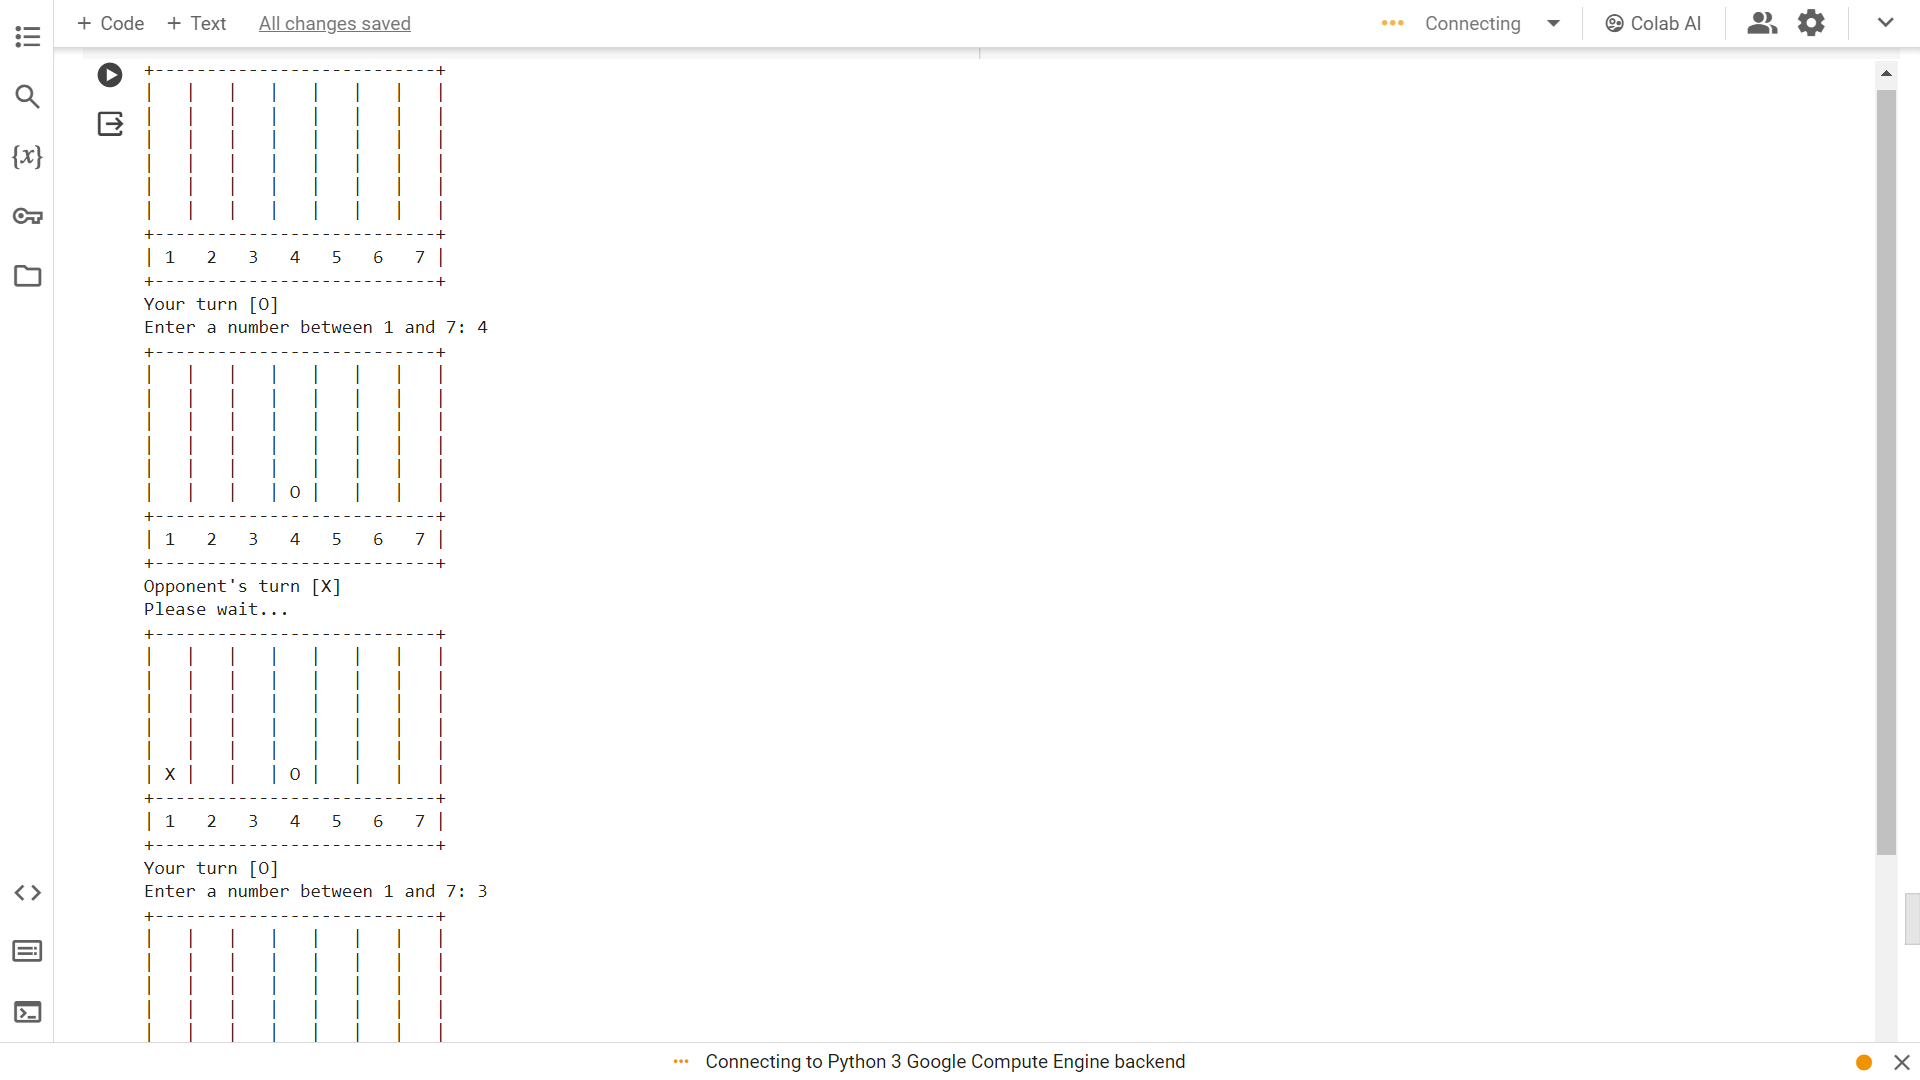


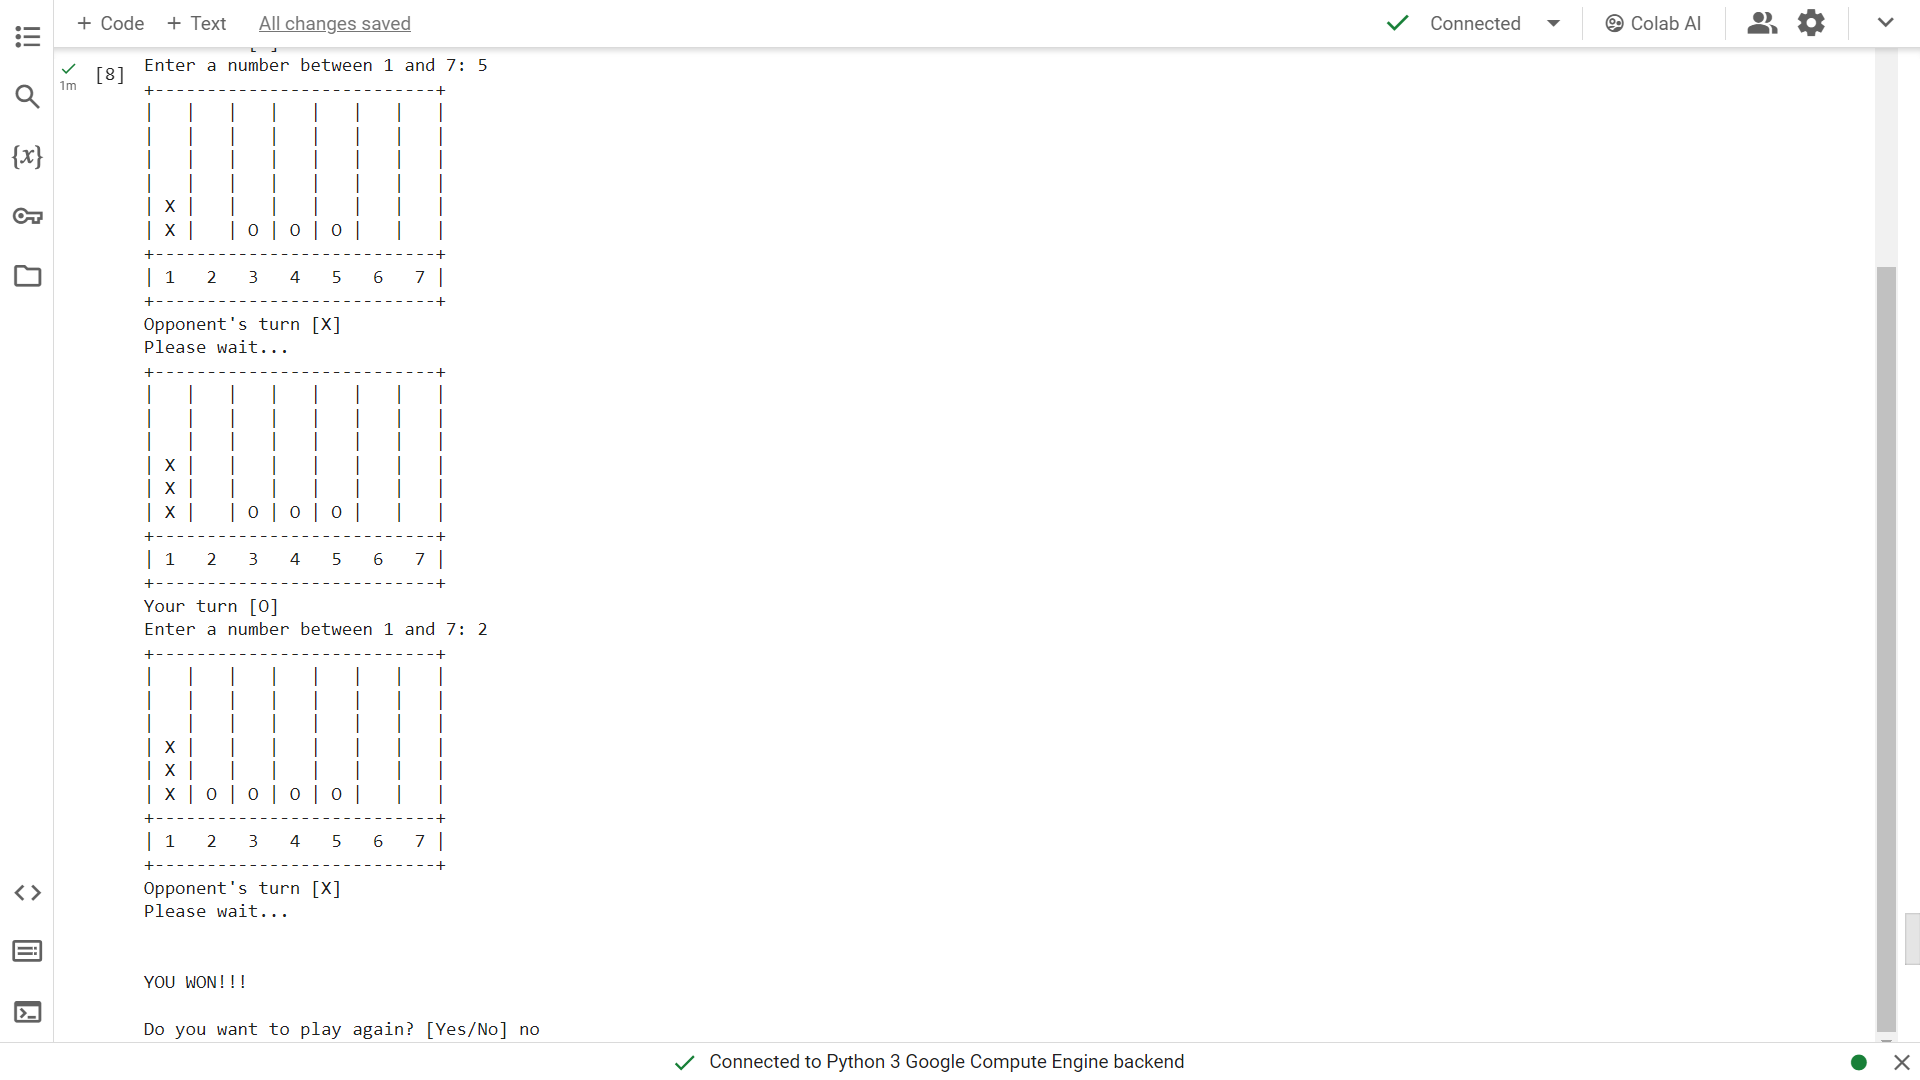

###   Monte Carlo Tree Search (AI vs AI)


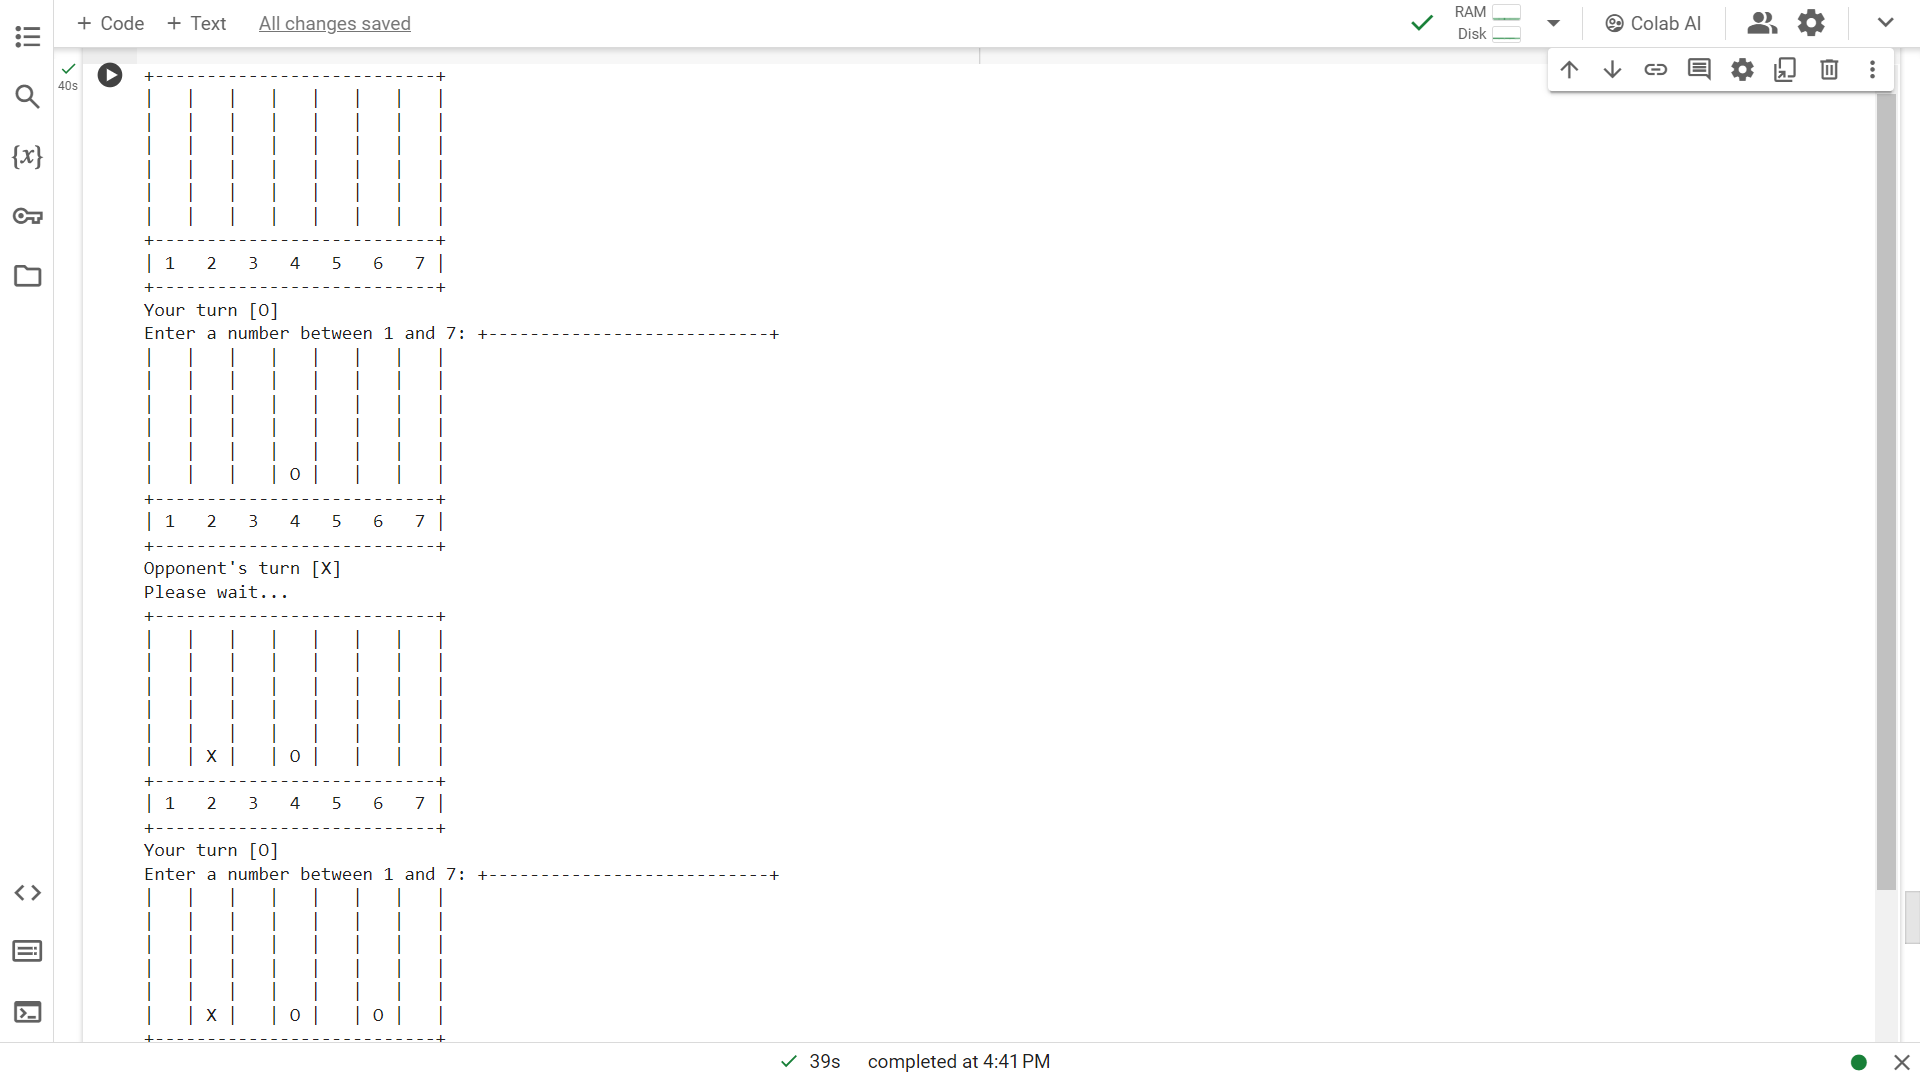




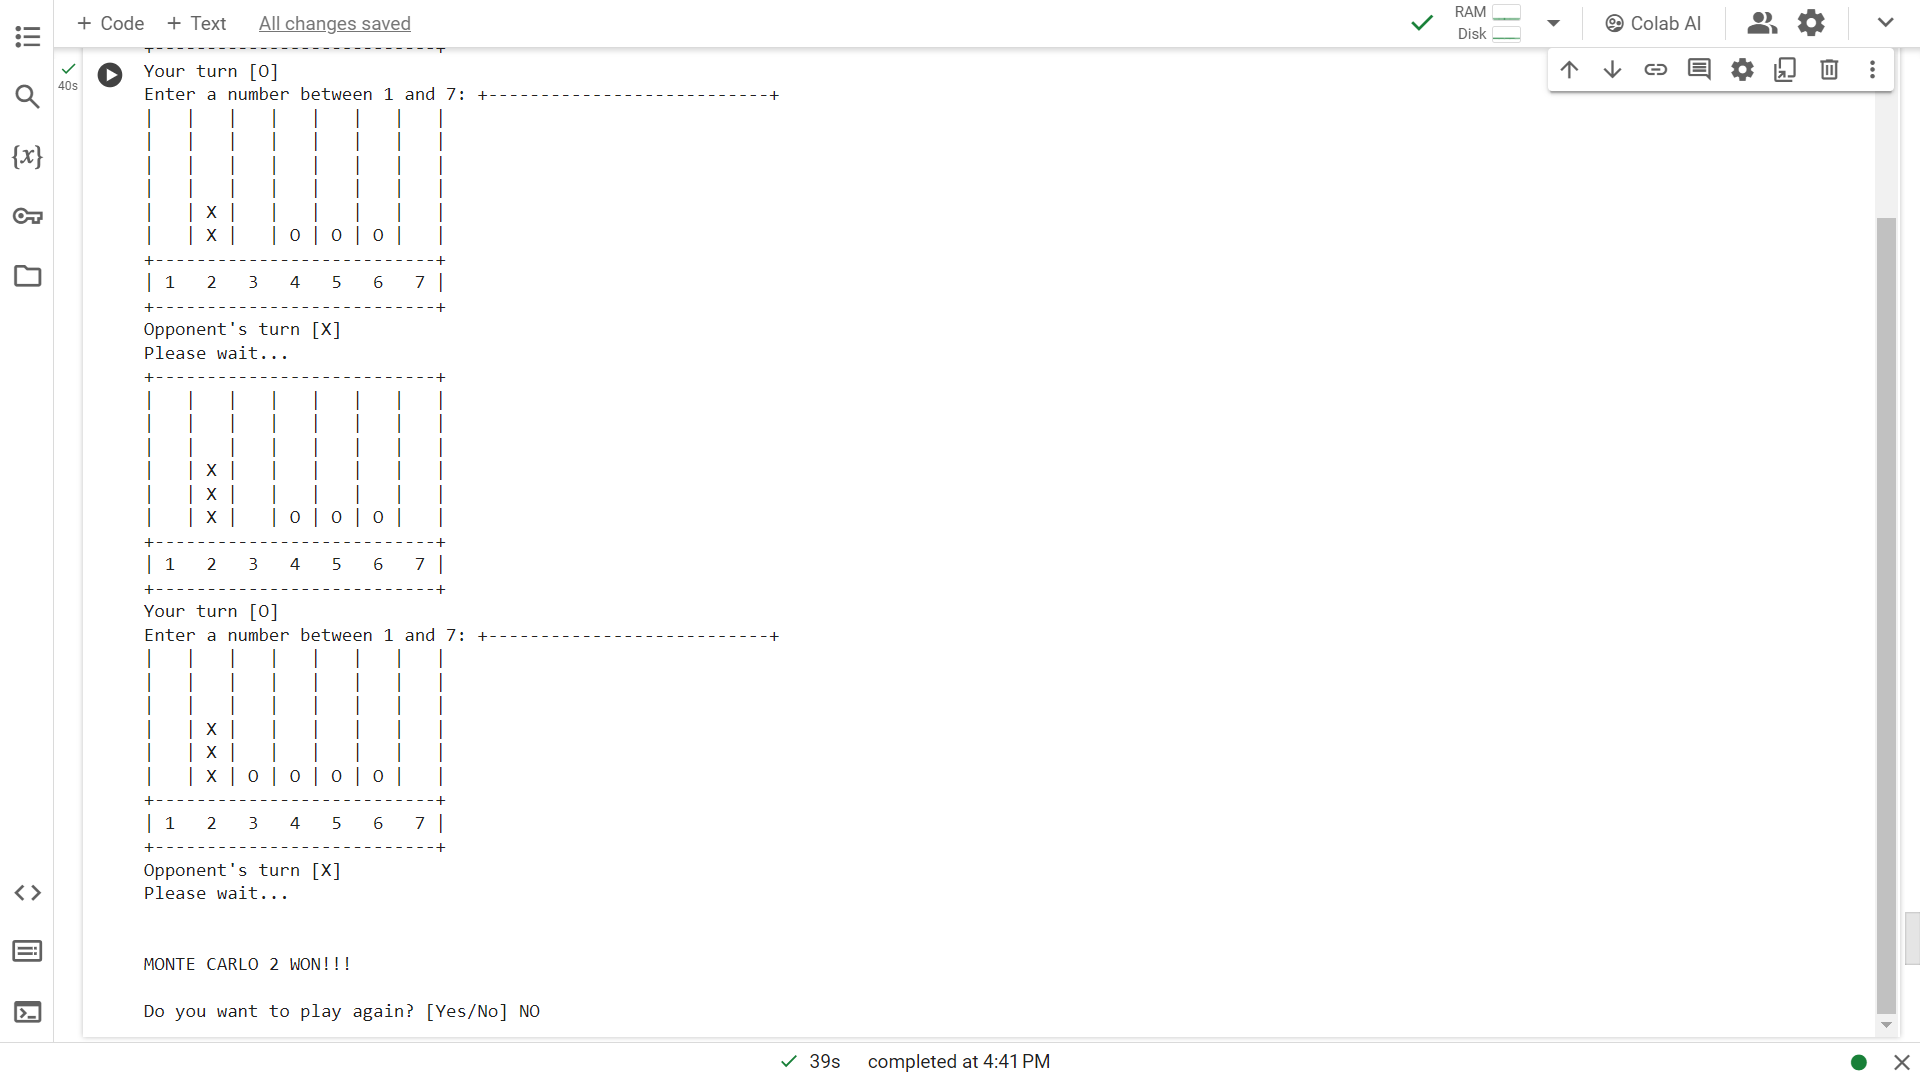

### Alpha-Beta (AI vs Human)

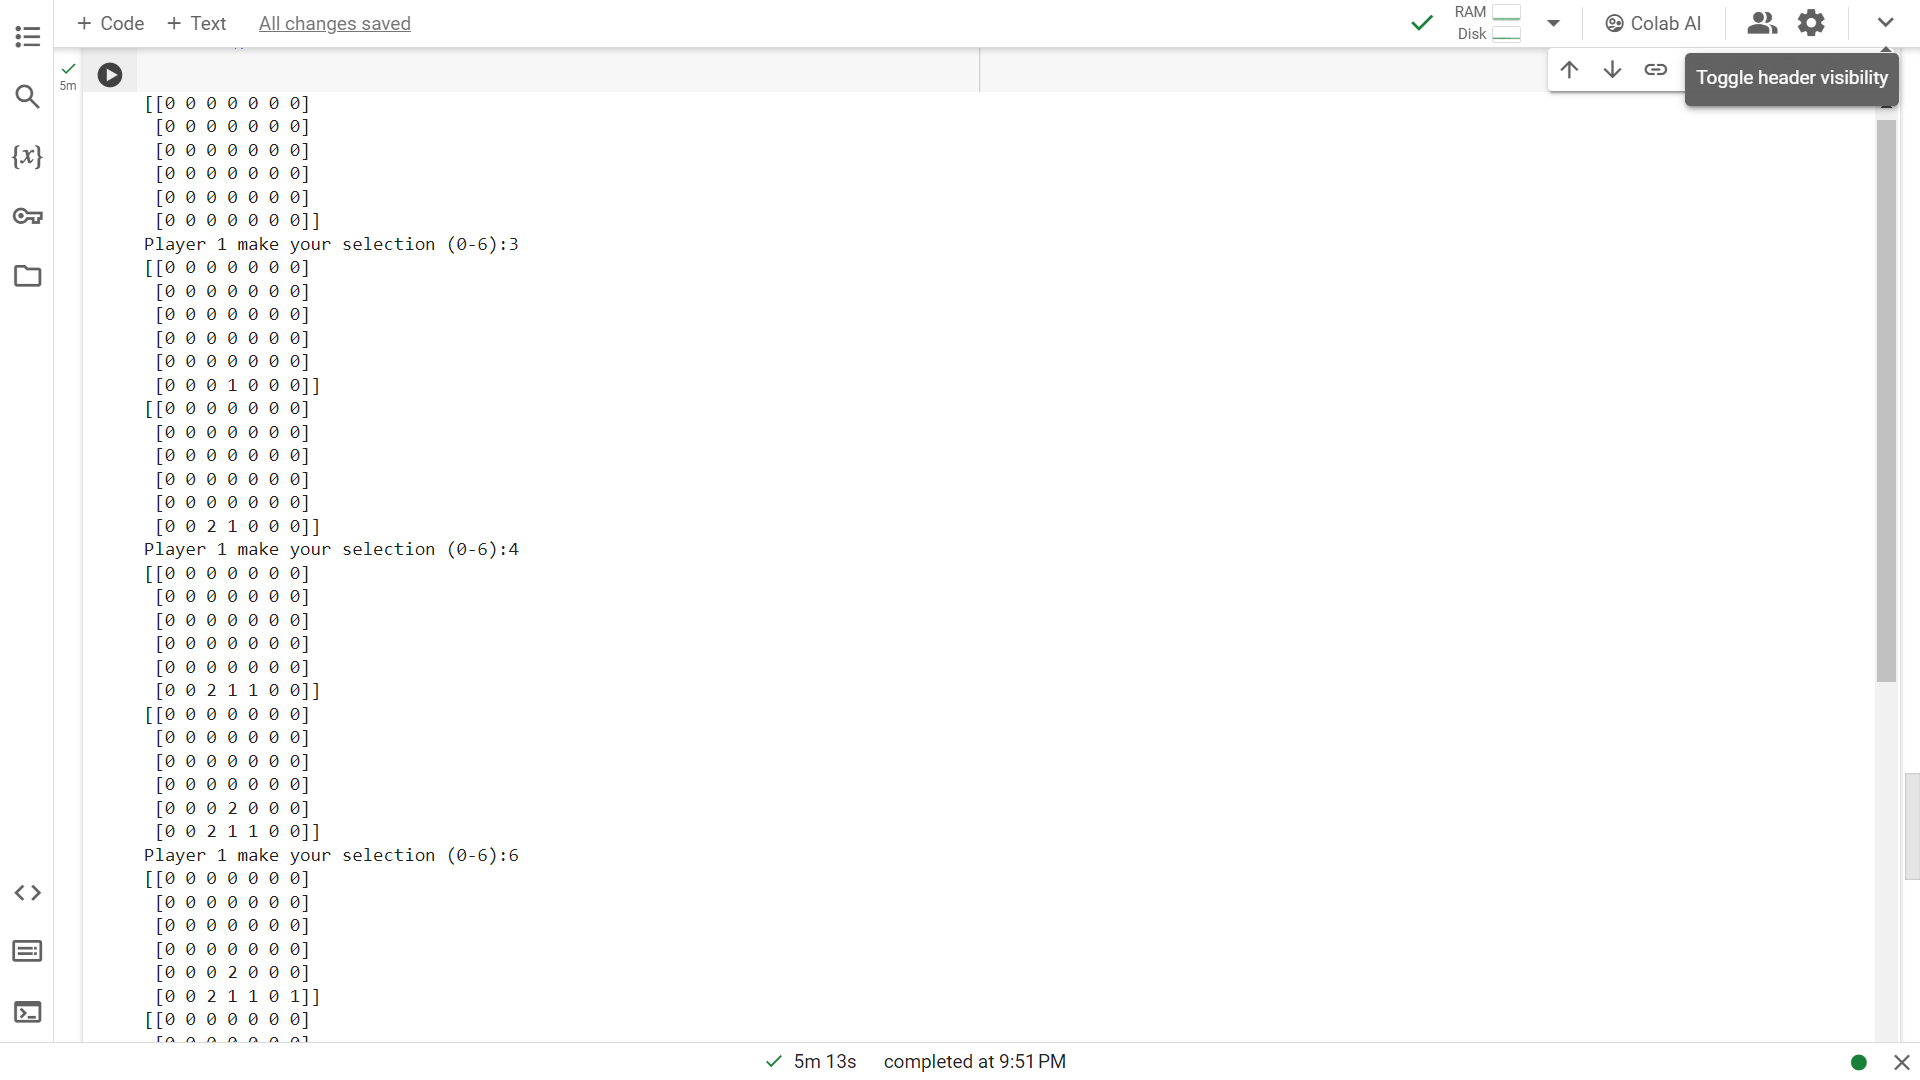




![Screenshot (36).png](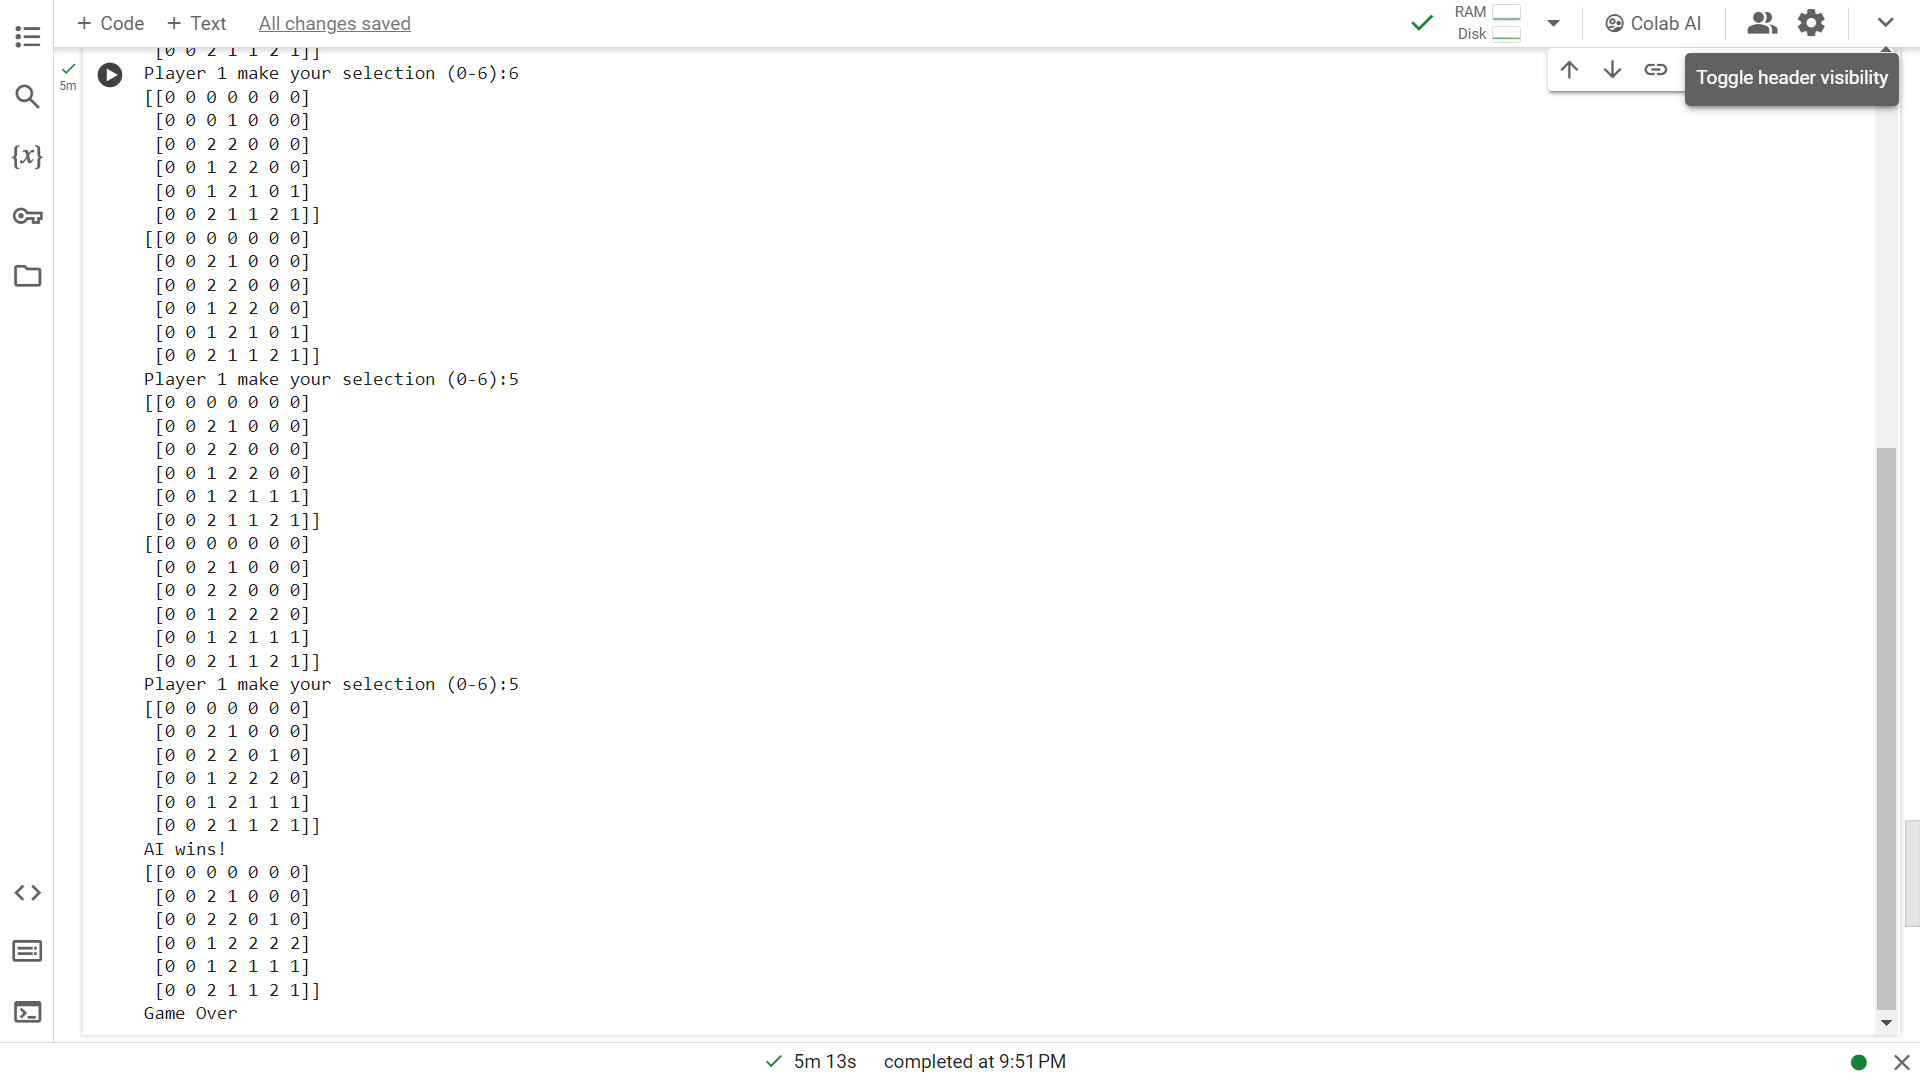![Screenshot (38).png](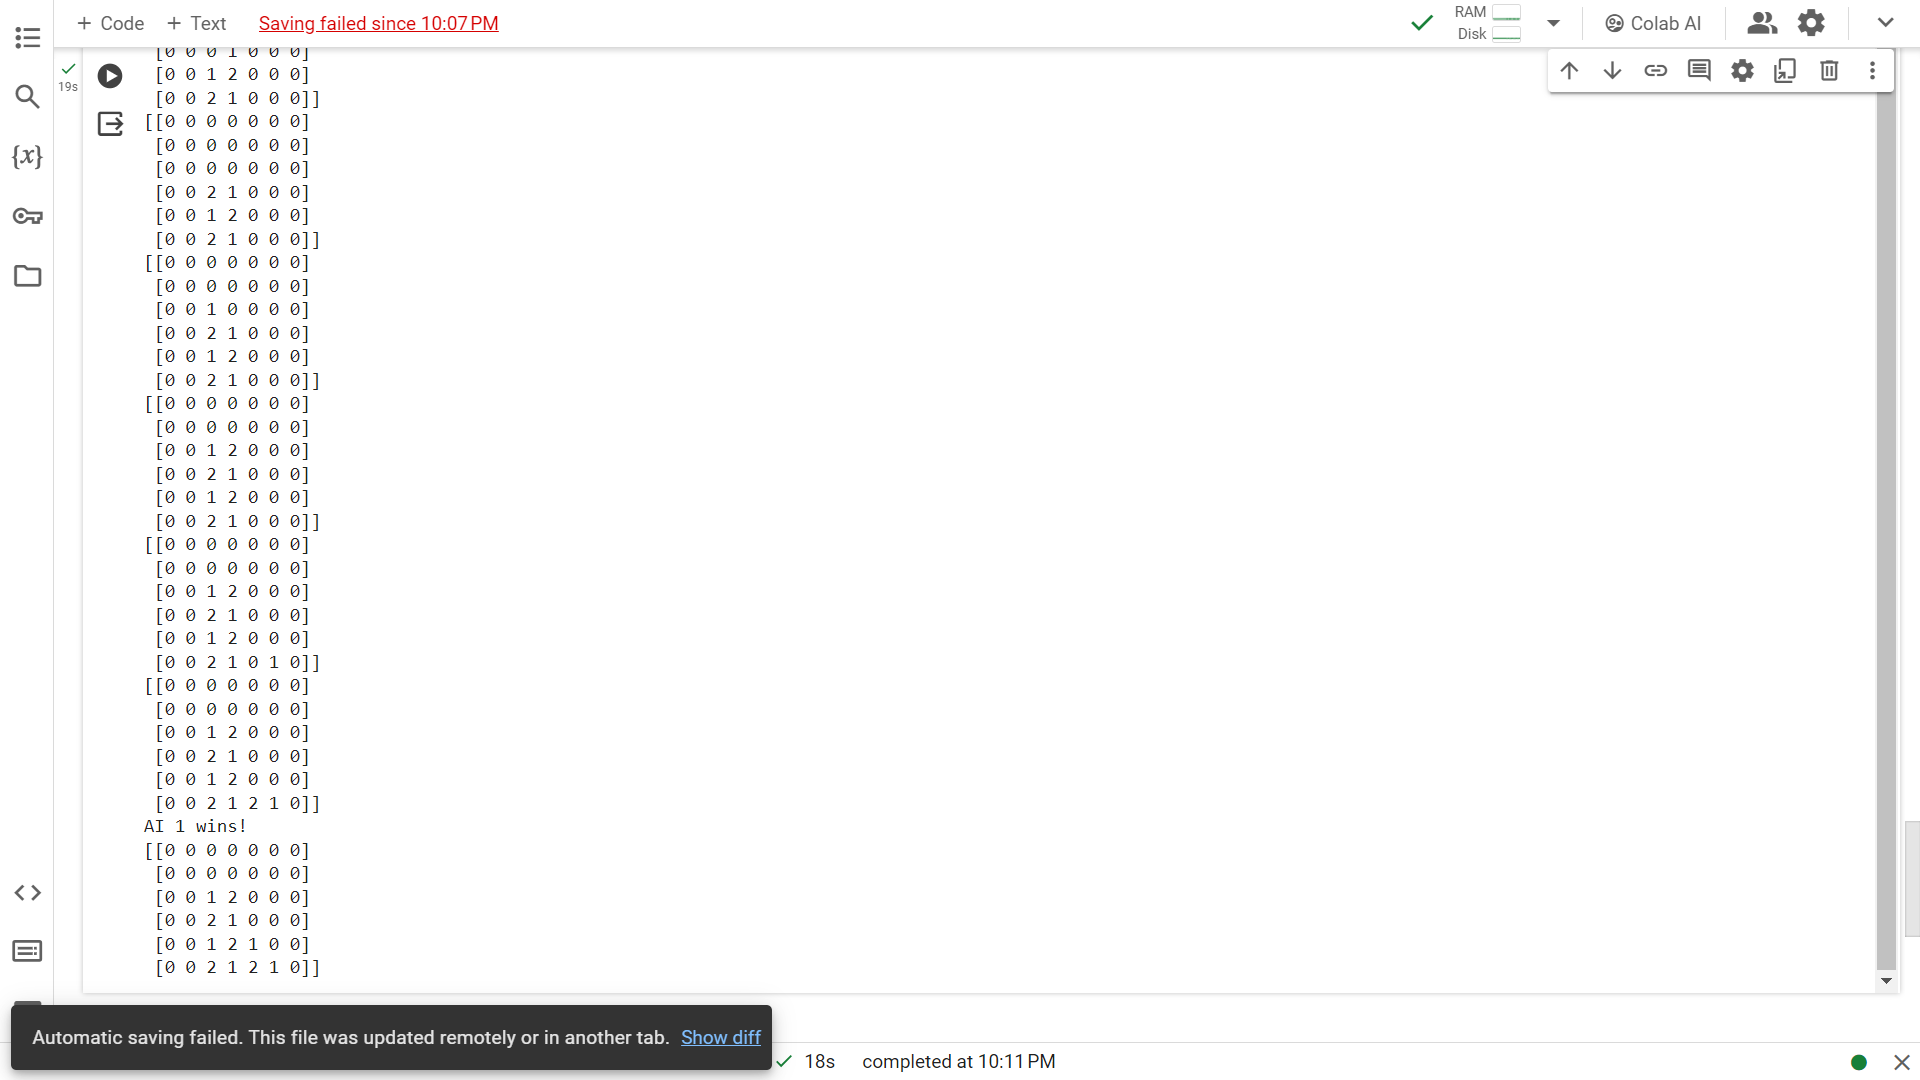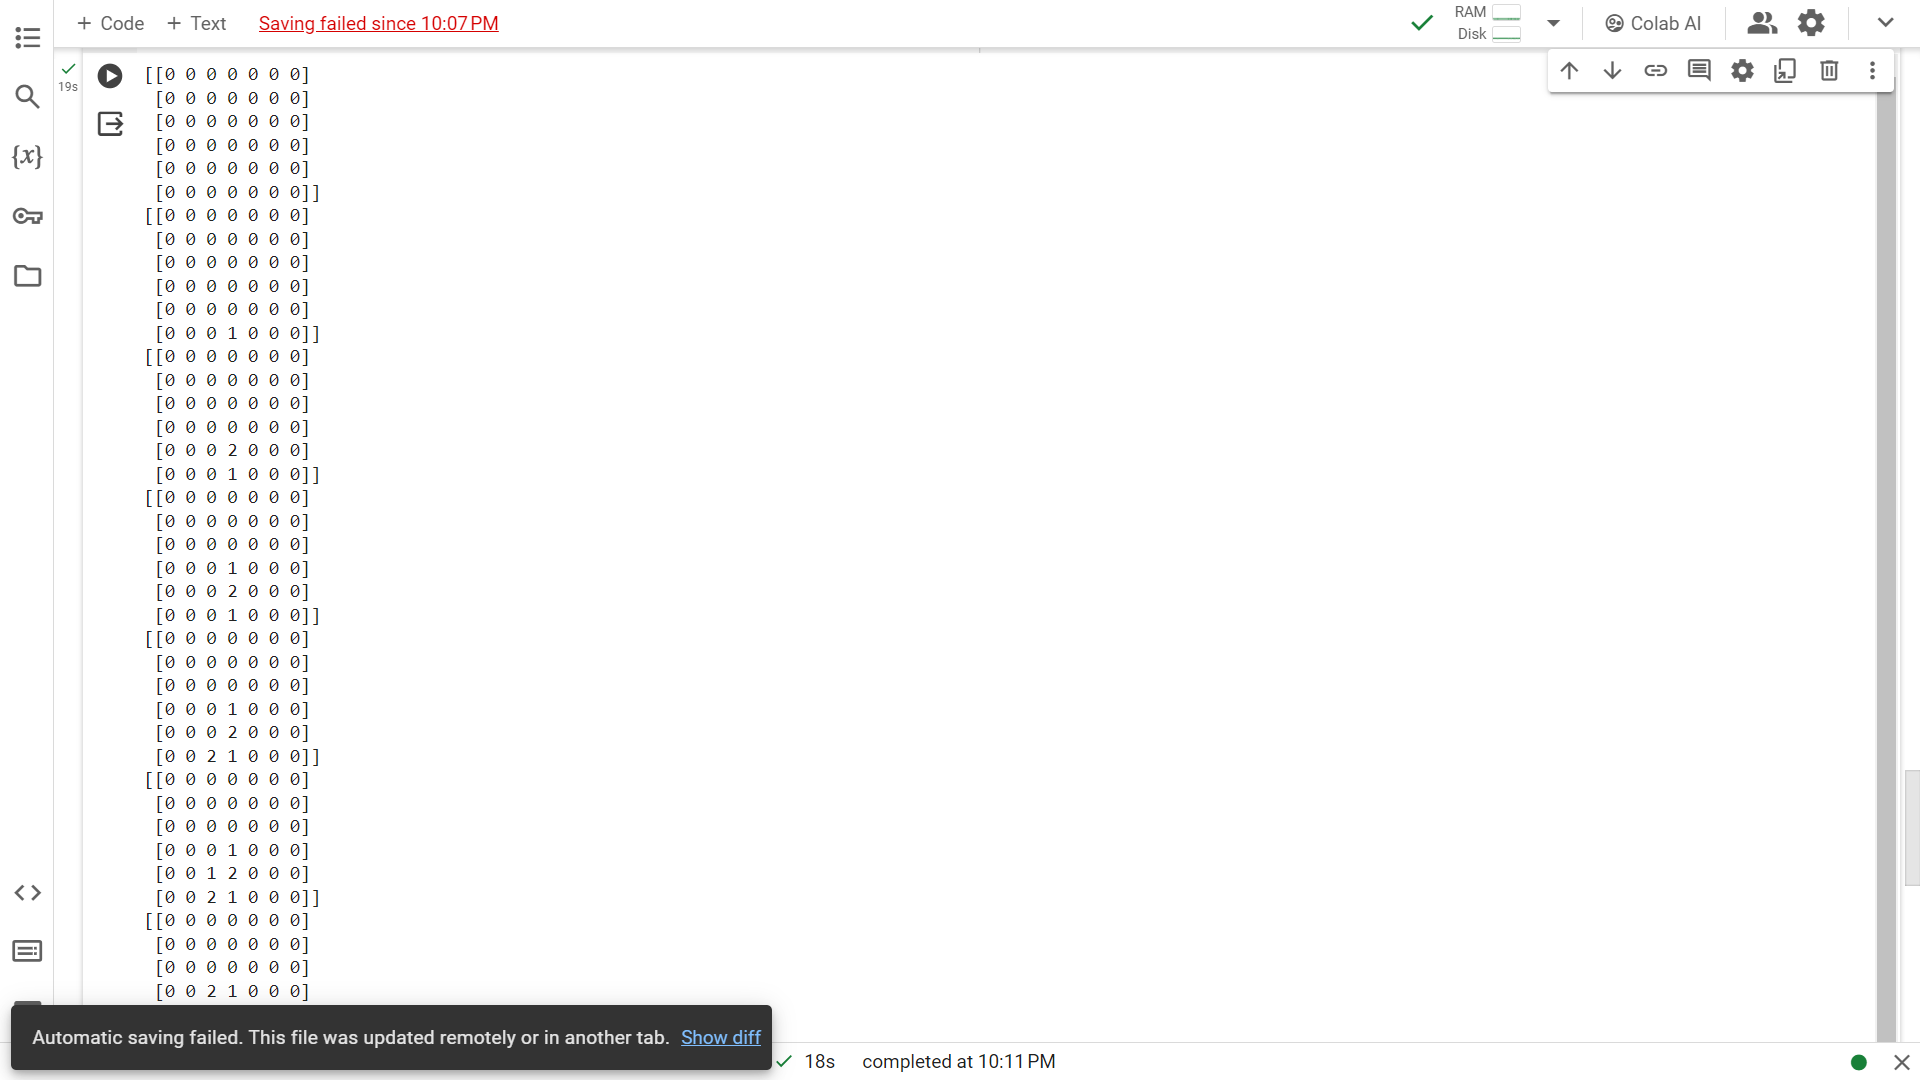)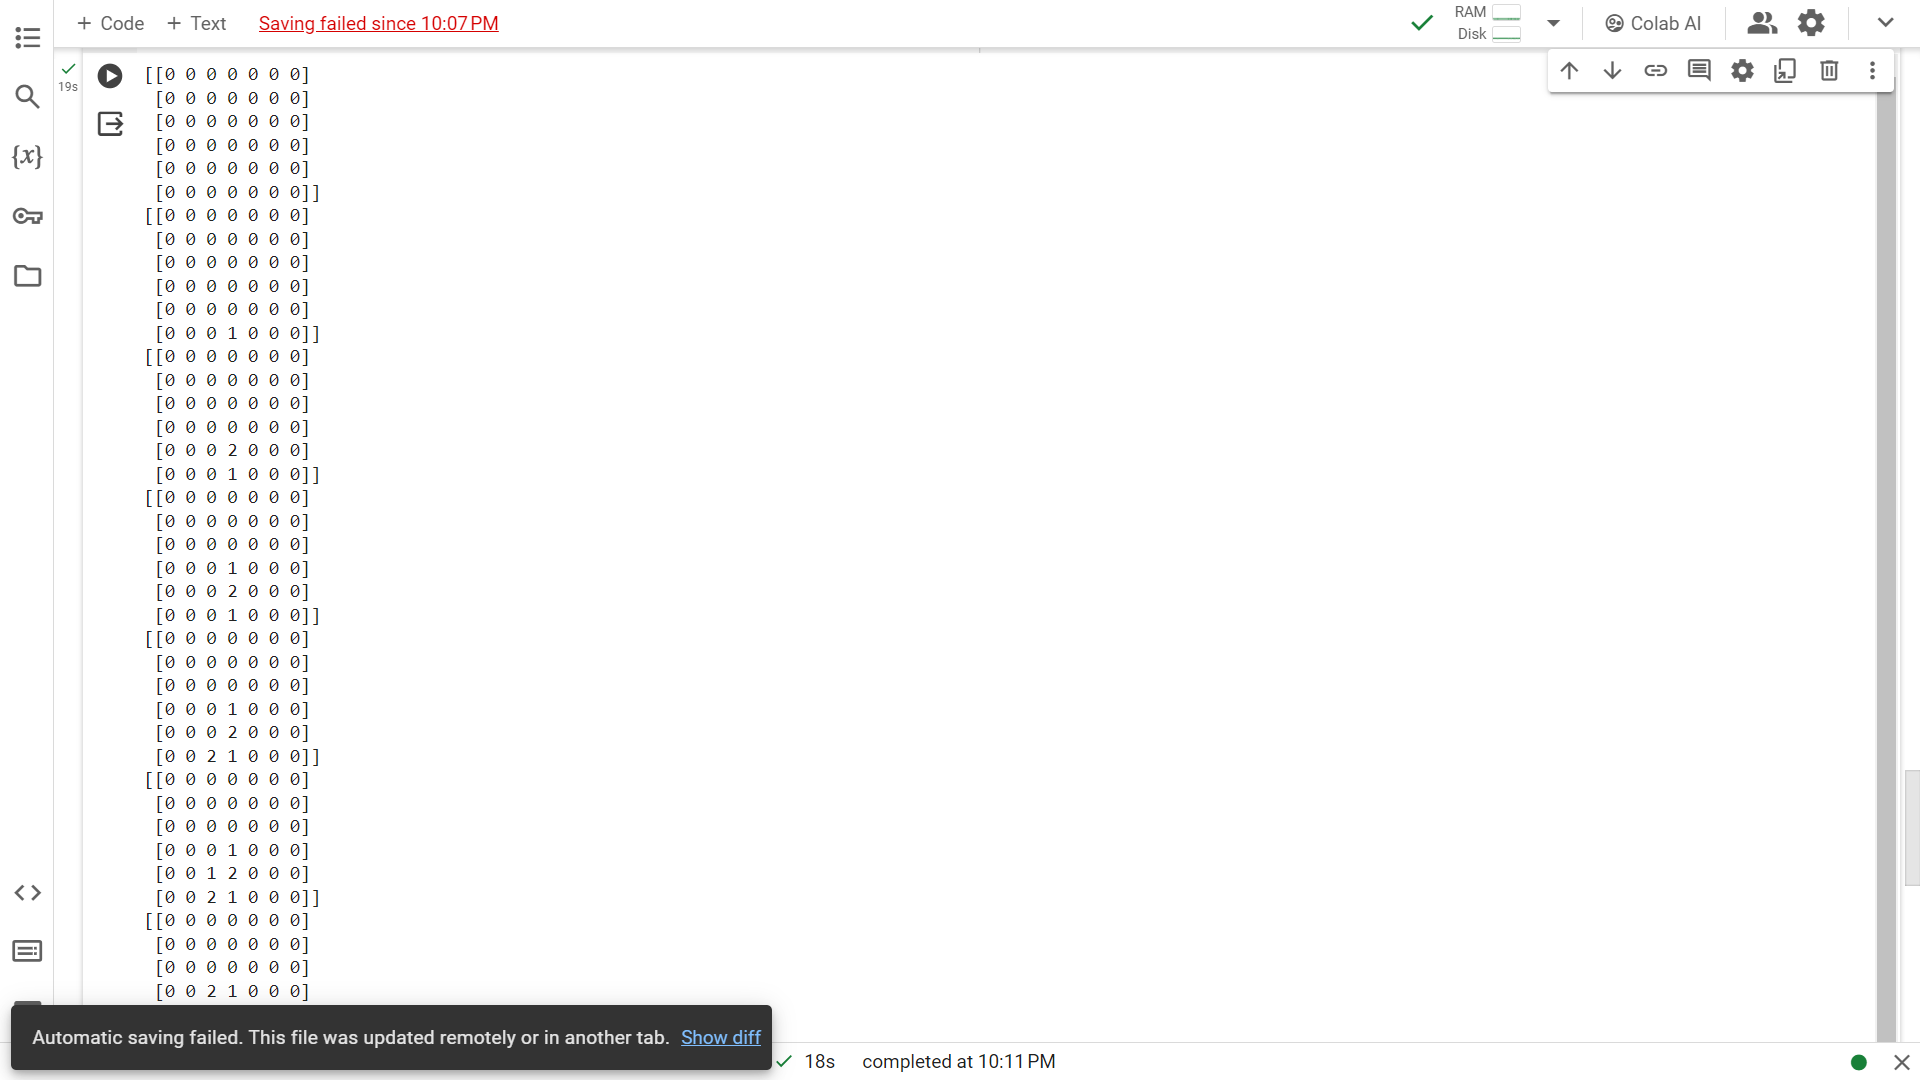)

### Alpha-Beta (AI vs AI)

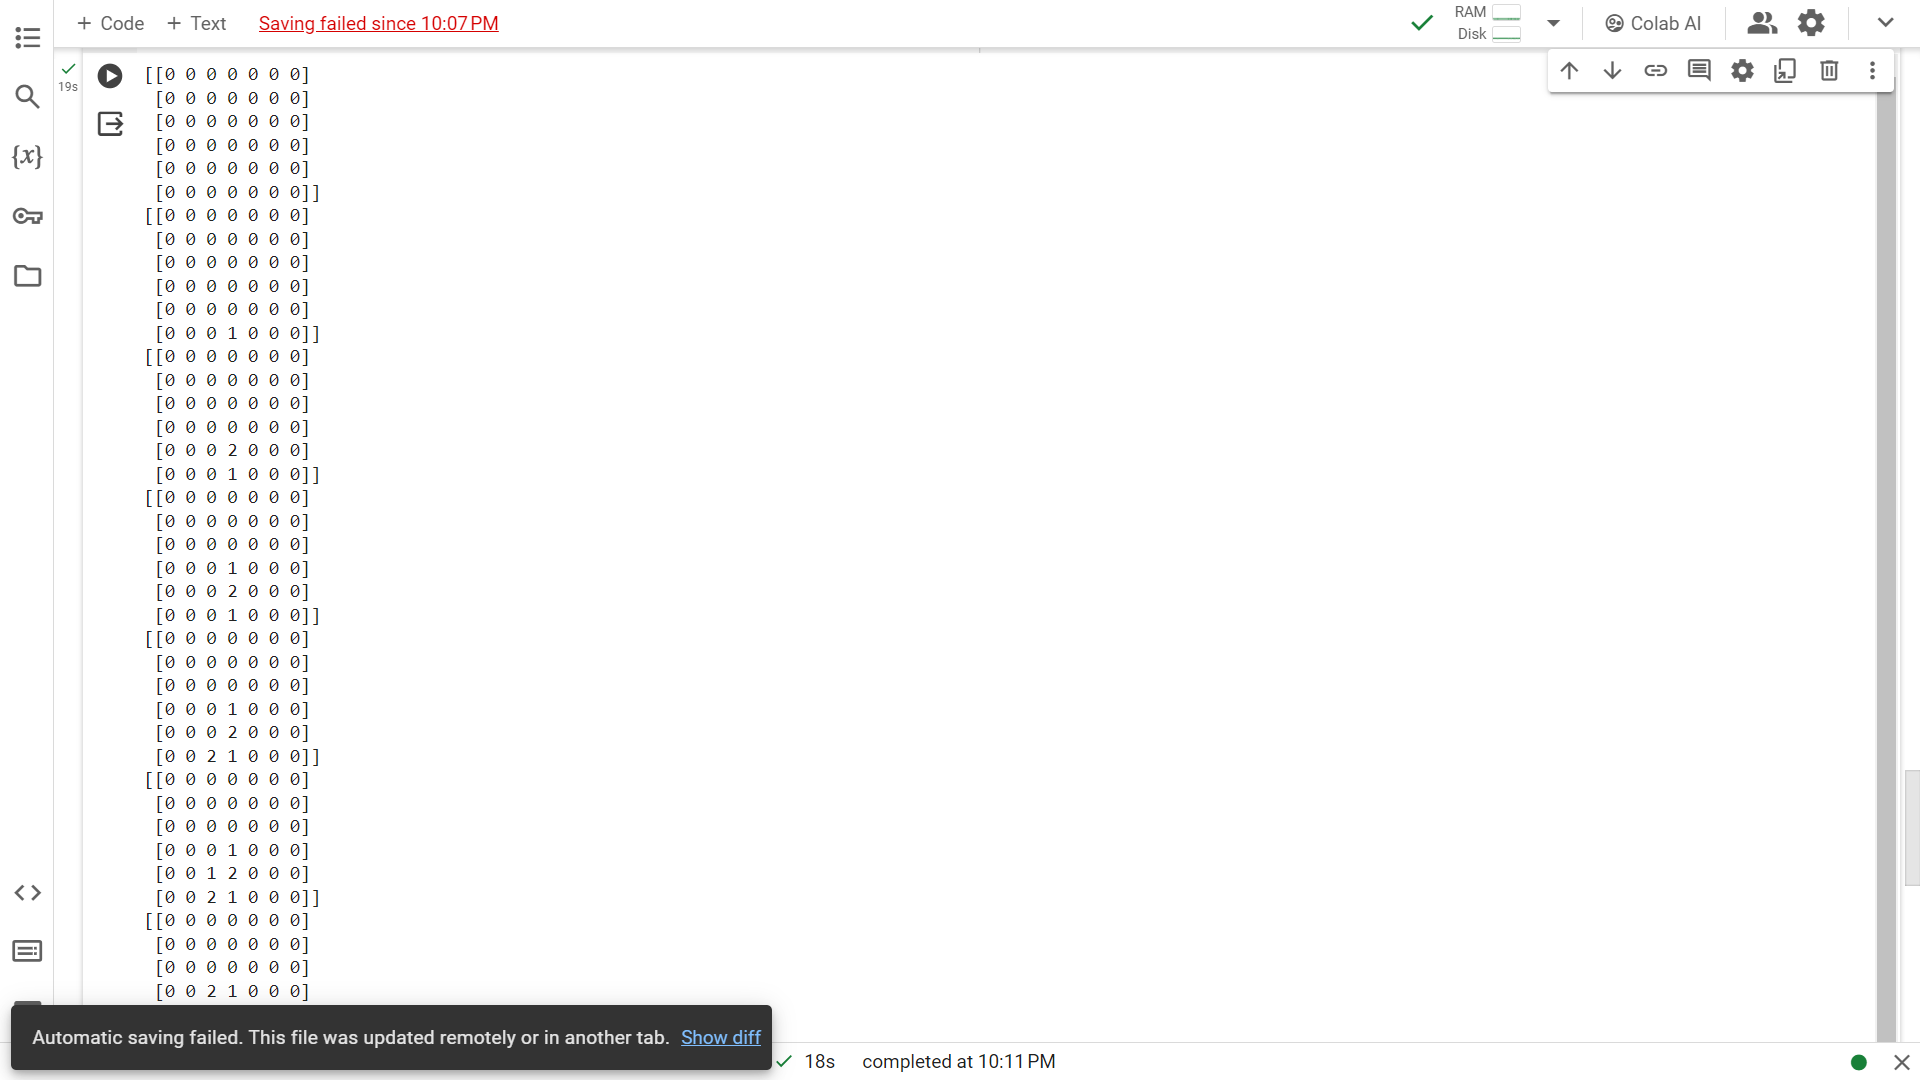



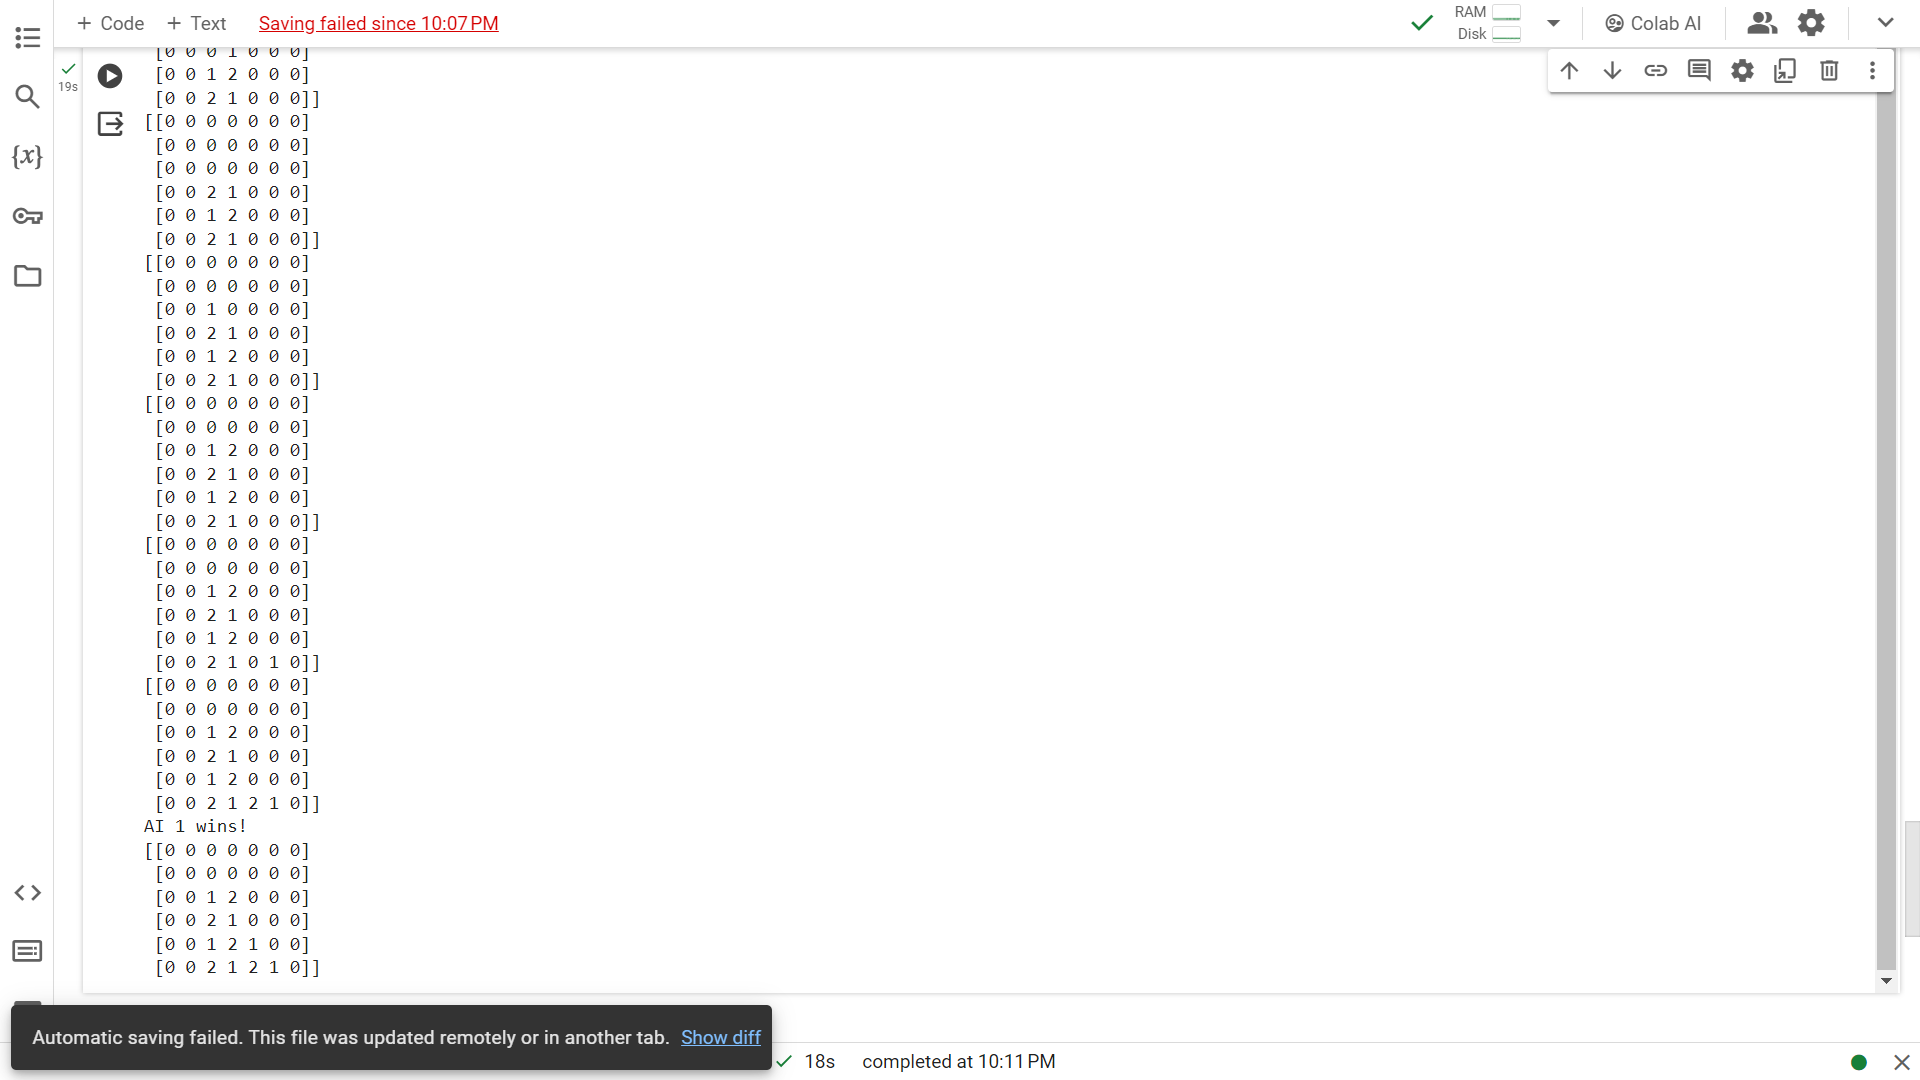

## **Insights**

* Comparing MCTS and Alpha-Beta Pruning in Connect Four highlights the trade-offs between efficiency and accuracy. While MCTS offers adaptability and robustness to uncertainty, Alpha-Beta Pruning provides deterministic optimality with lower computational costs.

* The insights gained from comparing these algorithms emphasize the importance of considering the specific characteristics of the game, such as its complexity, search space size, and uncertainty, when choosing an appropriate search algorithm.

* In Connect Four, where the game tree is relatively small and deterministic, Alpha-Beta Pruning may be preferred for its efficiency and accuracy. However, in more complex games with larger search spaces or uncertain dynamics, MCTS may offer better performance by effectively exploring and exploiting the game tree.